In [61]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sb
import plotly.express as px
import sklearn as sk

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PowerTransformer
from sklearn.utils import resample
from imblearn.over_sampling import SMOTE
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from scipy.stats import chi2_contingency

#Import of classifiers:
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score

### Using Colab (linked to Github):


In [3]:
# Mount Google Drive.
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [4]:
# ! pip install -q kaggle
# from google.colab import files
# files.upload()

In [5]:
# !rm -r /content/drive/MyDrive/kaggle
# !mkdir /content/drive/MyDrive/kaggle
# !mv ./kaggle.json /content/drive/MyDrive/kaggle/
# !chmod 600 /content/drive/MyDrive/kaggle/kaggle.json

In [6]:
# print("Files:")
# for dirname, _, filenames in os.walk('.'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

In [7]:
# API command of the dataset:
#!kaggle datasets download -d alexteboul/diabetes-health-indicators-dataset

In [8]:
# open the zip file in read mode
# !cp ./diabetes-health-indicators-dataset.zip /content/drive/MyDrive/csvs/diabetes-health-indicators-dataset.zip
# !unzip -q /content/drive/MyDrive/csvs/diabetes-health-indicators-dataset.zip -d /content/drive/MyDrive/csvs
# !rm /content/drive/MyDrive/csvs/diabetes-health-indicators-dataset.zip

In [9]:
# Use the desired dataset and remove the other 2:
df = pd.read_csv('/content/drive/MyDrive/csvs/diabetes_012_health_indicators_BRFSS2015.csv')
#!rm /content/drive/MyDrive/csvs/diabetes_binary_health_indicators_BRFSS2015.csv
#!rm /content/drive/MyDrive/csvs/diabetes_binary_5050split_health_indicators_BRFSS2015.csv

### Using Kaggle (linked with Github):
https://www.kaggle.com/discussions/general/74235

In [10]:
# print("Available datasets:")
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

In [11]:
# df = pd.read_csv('/kaggle/input/diabetes-health-indicators-dataset/diabetes_012_health_indicators_BRFSS2015.csv')

# About this project:
The topic for this project is the chronich illness of *Diabetes mellitus*. The used dataset is [diabetes_012_health_indicators_BRFSS2015.csv](https://www.kaggle.com/datasets/alexteboul/diabetes-health-indicators-dataset/data), a clean dataset of 253 680 survey responses to the [Behavioral Risk Factor Surveillance System (BRFSS) 2015](https://www.cdc.gov/brfss/annual_data/annual_2015.html), from the Centers for Disease Control and Prevention (CDC). [CDC](https://www.cdc.gov/about/organization/mission.htm) is the USA’s leading science-based, data-driven, service organization that protects the public’s health.<br>
The dataset is compound of 22 variables, of which *Diabetes_012* can be considered the target variable. Values for this *Diabetes_012* variable consist of 3 classes:
- 0 is for no diabetes or only during pregnancy,
- 1 is for prediabetes,
- and 2 is for diabetes.  



## *Goals:*
1. **To develop a tool that could assess profesionals in determining the diagnosis of Type II Diabetes.** This illness typically develops at middle age, with mild symptoms at the beginning, hindering an early diagnosis. <br>
A specific objective within building such a tool, is to explore the possibility of predicting pre-diabetes. Pre-diabetes is a reversible stage in the development of Diabetes illness.

2. **To stablish the most influencing factors in diabetes development, and their impact in building a model for diagnosis.** Is it possible to reach a good result selecting only attributes with the most impact?

3. **To deploy the model and use it with some real data**. How much would I(my father who ever need to change in order to be at risk to develop diabetes

4. **To study the existance of different types of patients with diabetes**. Clustering data could shed light into higher risk groups.



## *Structure of the project:*
It must be noted that, like in most Data Science Processes, the conducted workflow was cyclical, going back and forth between different steps (from Preprocessing to Modelling, from Modelling to Evaluation, from Evaluation to Preprocessing...). <br>
However, for the sake of a good, understandable order in the project, it has been determined that all actions carried out will be grouped under the step to which they belong. Those actions made in a cyclical repetition will be marked under comments "***Improvements in repetitions of the cycle***".

At the end of the work, in section Appendix, results leading to the repetitions of these actions will be included if pertinent.

# **Data Science Project: DIAGNOSIS OF DIABETES**

# Data preprocessing:
First step in the Data Science project is to understand and prepare the data for the next step.

In [12]:
df.describe()

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
count,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,...,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000
mean,0.296921,0.429001,0.424121,0.962670,28.382364,0.443169,0.040571,0.094186,0.756544,0.634256,...,0.951053,0.084177,2.511392,3.184772,4.242081,0.168224,0.440342,8.032119,5.050434,6.053875
std,0.698160,0.494934,0.494210,0.189571,6.608694,0.496761,0.197294,0.292087,0.429169,0.481639,...,0.215759,0.277654,1.068477,7.412847,8.717951,0.374066,0.496429,3.054220,0.985774,2.071148
min,0.000000,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,1.000000,24.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,6.000000,4.000000,5.000000
50%,0.000000,0.000000,0.000000,1.000000,27.000000,0.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,8.000000,5.000000,7.000000
75%,0.000000,1.000000,1.000000,1.000000,31.000000,1.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,3.000000,2.000000,3.000000,0.000000,1.000000,10.000000,6.000000,8.000000
max,2.000000,1.000000,1.000000,1.000000,98.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,13.000000,6.000000,8.000000


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Diabetes_012          253680 non-null  float64
 1   HighBP                253680 non-null  float64
 2   HighChol              253680 non-null  float64
 3   CholCheck             253680 non-null  float64
 4   BMI                   253680 non-null  float64
 5   Smoker                253680 non-null  float64
 6   Stroke                253680 non-null  float64
 7   HeartDiseaseorAttack  253680 non-null  float64
 8   PhysActivity          253680 non-null  float64
 9   Fruits                253680 non-null  float64
 10  Veggies               253680 non-null  float64
 11  HvyAlcoholConsump     253680 non-null  float64
 12  AnyHealthcare         253680 non-null  float64
 13  NoDocbcCost           253680 non-null  float64
 14  GenHlth               253680 non-null  float64
 15  

Dataset consists of the target variable "Diabetes_012" (described earlier), and 21 other independant variables. As it is shown, all of the variables have already been encoded to have numerical values:
- **HighBP**: 1 is has been told they have high blood pressure, 0 is has not.
- **HighChol**: 1 is has been told they have high cholesterol, 0 is has not.
- **CholCheck**: 1 has had cholesterol checked within the past 5 years, 0 is has not.
- **BMI**: Body Mass Index (value equal 1 or greater). Weight in $\text{Kg/(Heigth in m}^{2})$.
- **Smoker**: 1 has smoked at least 100 cigarettes in their entire life, 0 has not.
- **Stroke**: 1 has ever been diagnosed with a stroke, 0 has not.
- **HeartDiseaseorAttack**: 1 has reported having had coronary heart disease (CHD) or myocardial infarction (MI), 0 has not.
- **PhysActivity**: 1 has done physical activity or exercise during the previous 30 days other than their regular job, 0 has not
- **Fruits**: 1 consumes fruit one or more times per day, 0 does not.
- **Veggies**: 1 consumes vegetables one or more times per day, 0 does not.
- **HvyAlcoholCosump**: 1 is a heavy drinker (adult men having more than 14 drinks per week and adult women having more than 7 drinks per week), 0 is not.
- **AnyHealthcare**: 1 has any kind of health care coverage, including health insurance, prepaid plans such as HMOs, or government plans such as Medicare, or Indian Health Service, 0 has not.
- **NoDocbcCost**: 1 there has been a time in the past 12 months when needed to see a doctor but could not because of cost, 0 there has been not.
- **GenHlth**: “Would you say that in general your health is“, state of general health, where 1 is Excellent, 2 is Very good, 3 is Good, 4 is Fair and 5 is Poor.
- **MentHlth**: thinking about mental health (which includes stress, depression, and problems with emotions), the number of days during the past 30 days in which your mental health was not good (value between 0 and 30).
- **PhysHlth**: thinking about physical health (which includes physical illness and injury), the number of days during the past 30 days in which your physical health was not good (value between 0 and 30).
- **DiffWalk**: 1 has serious difficulty walking and climbing stairs, 0 has not.
- **Sex**: 1 is male, 0 is female.
- **Age**: age category from 18 to 99, divided in 13 classes: where 1 is 18 – 24 age, 2 is 25 – 29 age, 3 is 30 - 34 age, 4 is 35 – 39 age, 5 is 40 – 44 age, 6 is 45 – 49 age, 7 is 50 - 54 age, 8 is 55 – 59 age, 9 is 60 – 64 age, 10 is 65 – 69 age, 11 is 70 – 74 age, 12 is 75 – 79 age, 13 is 80 – 99 age.
- **Education**: 1 never attended school, 2 elementary school, 3 some High School, 4 High School graduate, 5 some college or technical school, 6 college graduates
- **Income**: annual household income from all sources: where 1 is (0, 10 000\\$); 2 is (10 000, 15 000\\$); 3 is (15 000, 20 000\\$); 4 is (20 000, 25 000\\$); 5 is (25 000, 35 000\\$); 6 is (35 000, 50 000\\$); 7 is (50 000, 75 000\\$); and 8 is (75 000\\$ or more).  

Source: [Behavioral Risk Factor Surveillance System
2015 Codebook Report](https://www.cdc.gov/brfss/annual_data/2015/pdf/codebook15_llcp.pdf)

## Data cleaning:

### Dealing with impossible and missing values:

Because the dataset is clean and complete (no missing values, no impossible values, no bad formatting), no further preprocessing of data is neccessary in this regards.

In [14]:
print("MISSING VALUES FOR EACH VARIABLE:")
print(df.isnull().sum(), "\n")
print("SHAPE OF THE DATASET:", df.shape)

MISSING VALUES FOR EACH VARIABLE:
Diabetes_012            0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64 

SHAPE OF THE DATASET: (253680, 22)


#### NUMERICAL FEATURES:
Out of the 22 columns of the dataset, only 5 (*BMI, MentHlth, PhysHlth, Age* and *Income*) are numerical features.
It should be taken into account that *Age* and *Income* have already been grouped in categories, like previously mentioned.

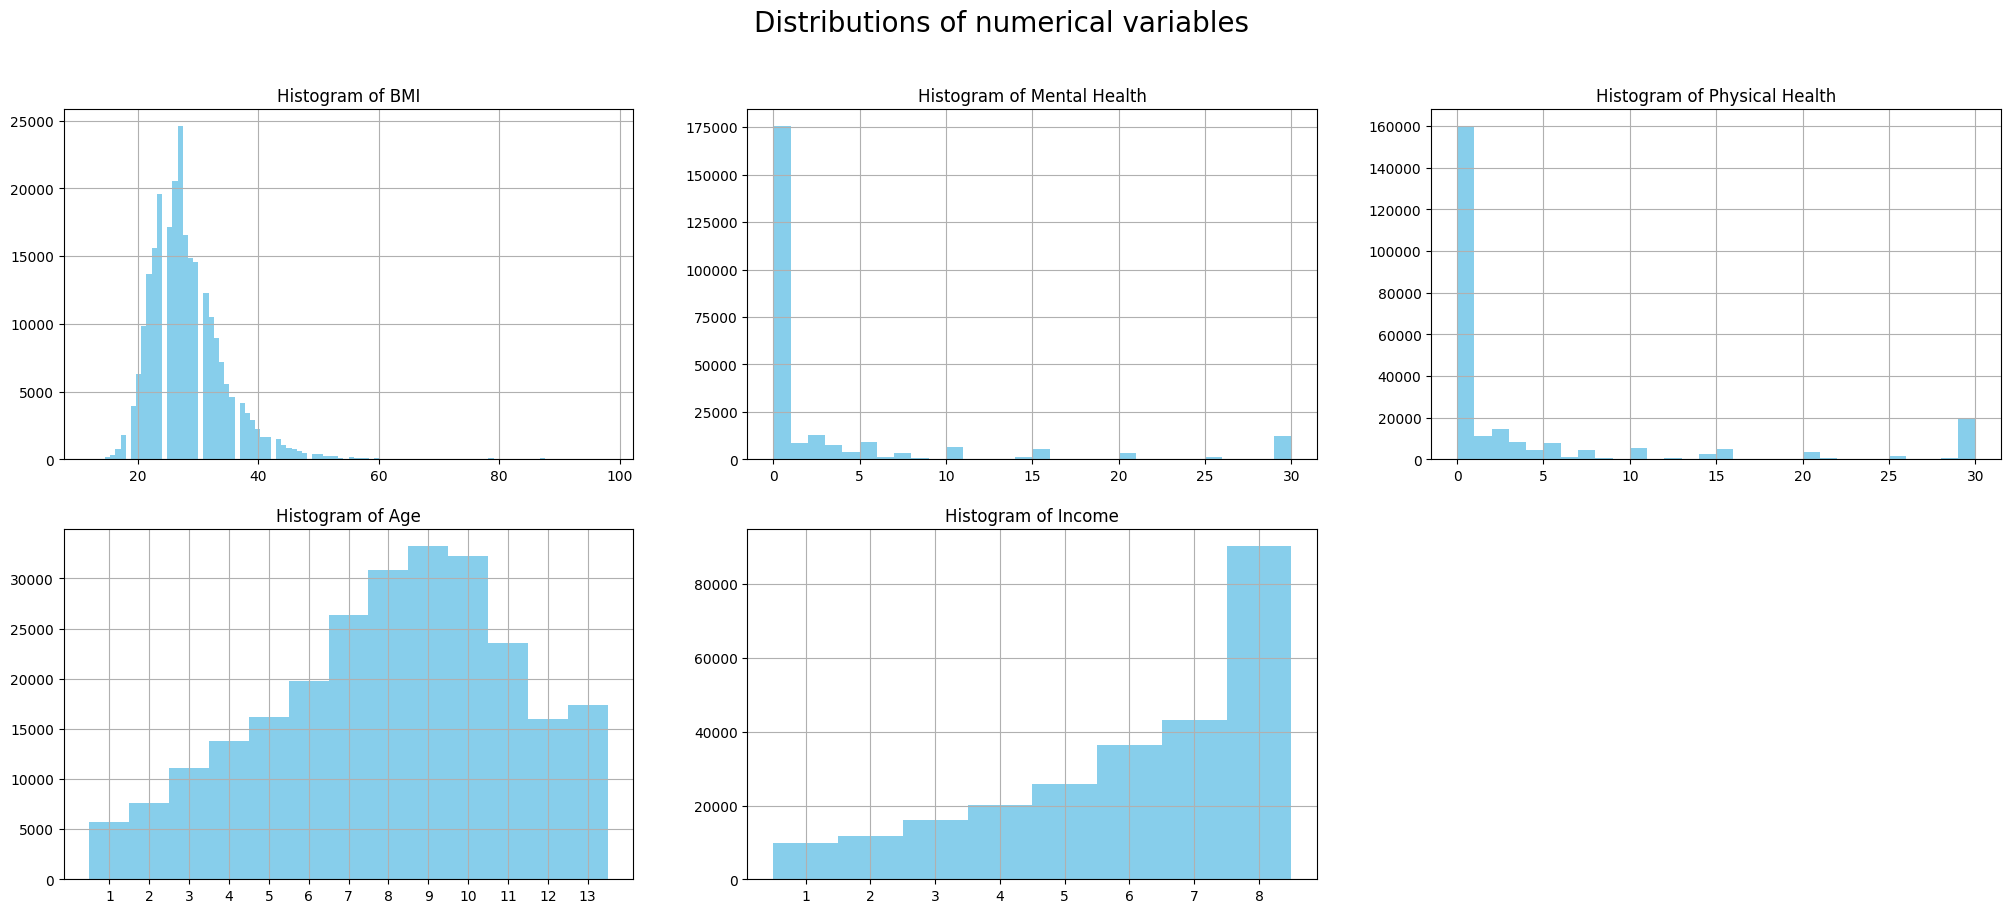

In [15]:
df_numerical = df[['BMI','MentHlth','PhysHlth','Age','Income']]

# Creation of subplots:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(25, 10))

# Flatten the axes array to a 1D array
axes = axes.flatten()#Converting the 2D array of axes objects into a 1D array.
                     #Useful when you want iterating over the subplots,
                     #regardless of whether there is one row or multiple rows.

# Remove empty subplot in row 2, column 3 because it is empty
fig.delaxes(axes[-1])

# Specifications for each subplot
# Subplot for BMI:
axes[0].hist(df_numerical['BMI'], bins=100, color='skyblue')
axes[0].set_title('Histogram of BMI')
axes[0].grid(True)

# Subplot for MentHlth:
axes[1].hist(df_numerical['MentHlth'], bins=30, color='skyblue')
axes[1].set_title('Histogram of Mental Health')
axes[1].grid(True)

# Subplot for PhysHlth:
axes[2].hist(df_numerical['PhysHlth'], bins=30, color='skyblue')
axes[2].set_title('Histogram of Physical Health')
axes[2].grid(True)

# Subplot for Age:
axes[3].hist(df_numerical['Age'], bins=np.arange(0.5, 14, 1), color='skyblue')
axes[3].set_title('Histogram of Age')
axes[3].set_xticks(np.arange(1, 14, 1))  # Set custom xticks
axes[3].grid(True)

# Subplot for Income:
axes[4].hist(df_numerical['Income'], bins=np.arange(0.5, 9, 1), color='skyblue')
axes[4].set_title('Histogram of Income')
axes[4].grid(True)

# Adjust layout
# plt.tight_layout()
plt.suptitle("Distributions of numerical variables", fontsize=20)
plt.show()

#### CATEGORICAL FEATURES:
The rest of the variables in the dataset are categorical, having only a possible prestablished set of possible values. Despite their categorical nature, all features have already been transformed into a numerical codification.
Within them, we find those variables which have only 2 possible values (0 or 1), *"BI-CATEGORICAL" VARIABLES*; and those which have more than 2 possible values, *"MULTI-CATEGORICAL" VARIABLES*. The latter group can also be divided into *ORDINAL VARIABLES* that follow an order (like *Education* and *GenHlth*) and *NOMINAL*, like *Diabetes_012*.

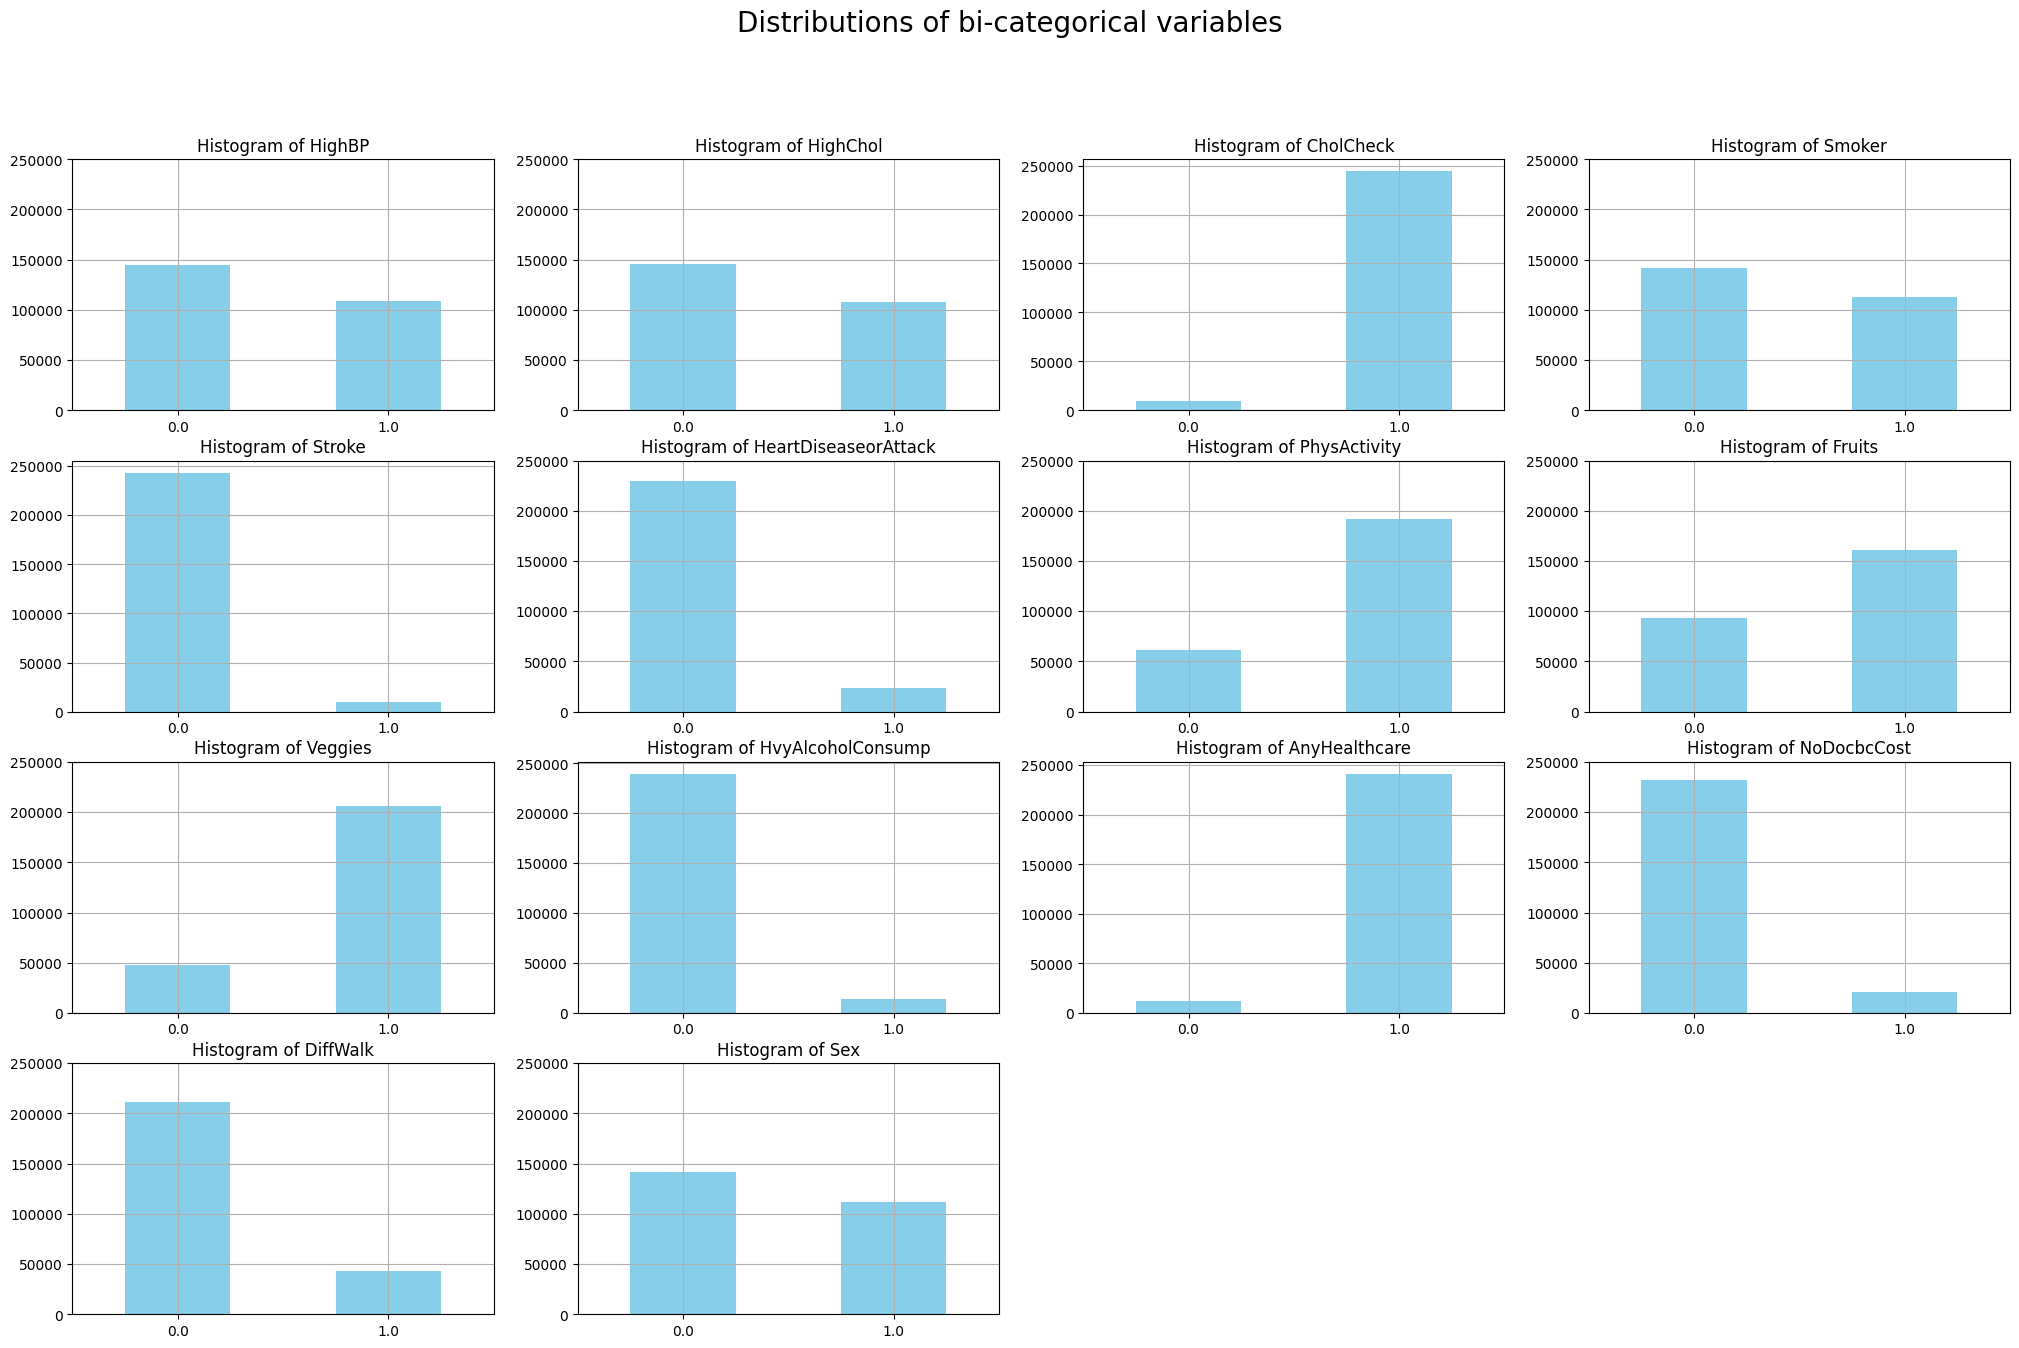

In [16]:
# BI-CATEGORICAL VARIABLES:
df_biCategorical = df[['HighBP','HighChol','CholCheck','Smoker','Stroke','HeartDiseaseorAttack','PhysActivity','Fruits','Veggies','HvyAlcoholConsump','AnyHealthcare','NoDocbcCost','DiffWalk','Sex']]

# Creation of subplots:
fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(25, 15)) #'axes' is an array with two elements, 2D.
                                                            # Each 'axes' object represents one subplot.

# Flatten the axes array to a 1D array
axes = axes.flatten()#Converting the 2D array of axes objects into a 1D array.
                     #Useful when you want iterating over the subplots,
                     #regardless of whether there is one row or multiple rows.

# Remove empty subplot in row 2, column 3 because it is empty
fig.delaxes(axes[-2])
fig.delaxes(axes[-1])

for i, feature in enumerate(df_biCategorical.columns):
    ax = axes[i]
    df_biCategorical[feature].value_counts().sort_index().plot(kind='bar', color='skyblue', ax=ax)
    ax.set_title(f'Histogram of {feature}')
    ax.set_xlabel('')
    # Rotate x-axis labels
    ax.set_xticklabels(ax.get_xticklabels(), rotation=0)
    ax.set_yticks(np.arange(0, 300000, 50000))
    ax.grid(True)

# Adjust layout
plt.suptitle("Distributions of bi-categorical variables", fontsize=20)
#plt.tight_layout()
plt.show()

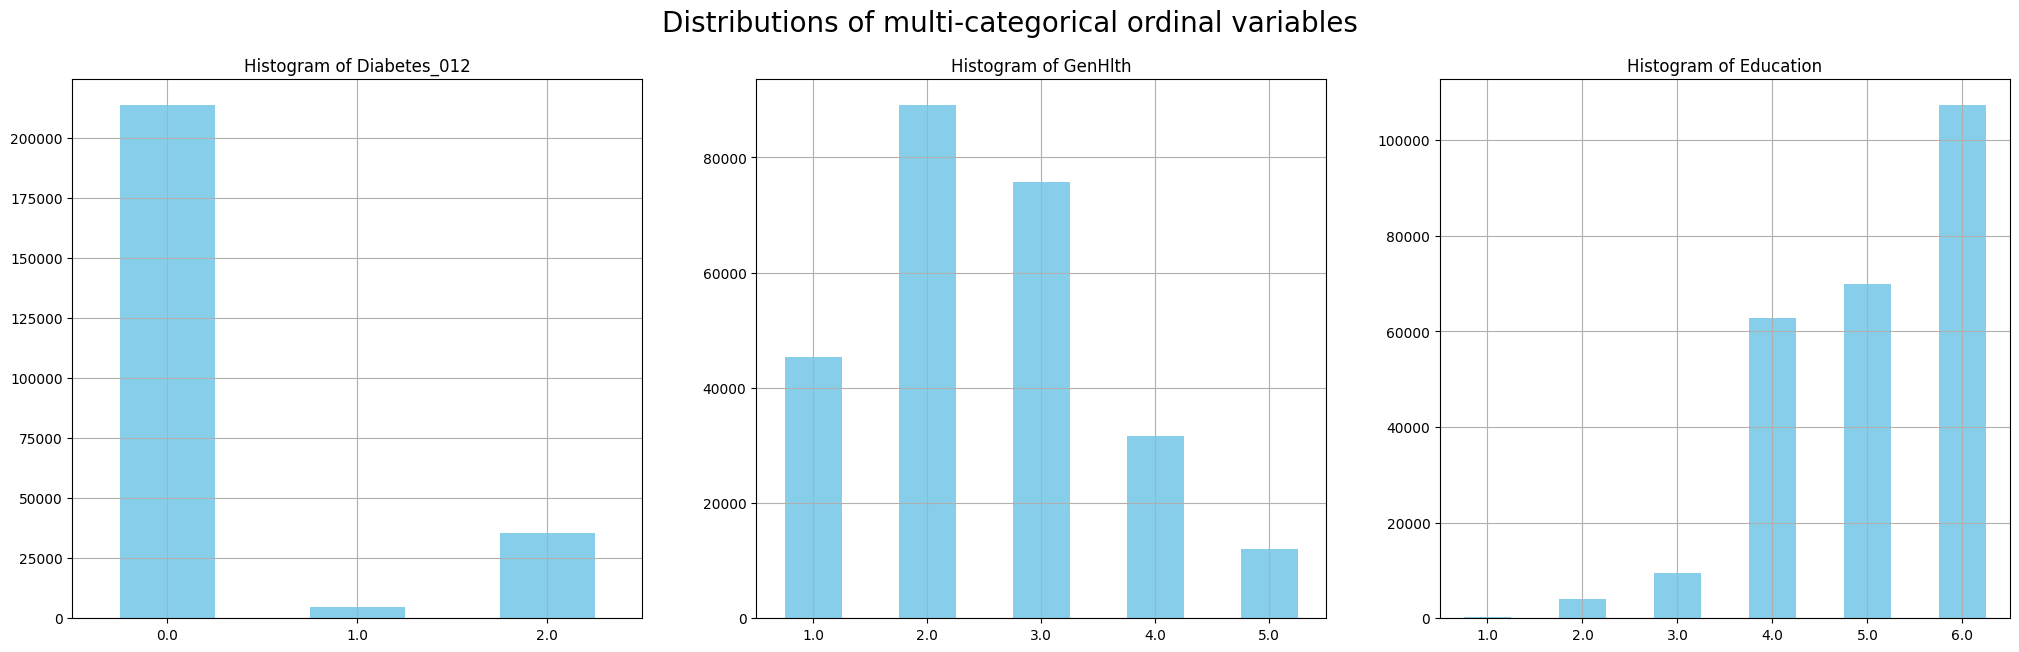

In [17]:
#MULTI-CATEGORICAL VARIABLES:
df_multiCategorical = df[['Diabetes_012','GenHlth','Education']]

# Creation of subplots:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(25, 7)) #'axes' is an array with two elements, 2D.
                                                            # Each 'axes' object represents one subplot.

for i, feature in enumerate(df_multiCategorical.columns):
    ax = axes[i]
    df_multiCategorical[feature].value_counts().sort_index().plot(kind='bar', color='skyblue', ax=ax)
    ax.set_title(f'Histogram of {feature}')
    ax.set_xlabel('')
    # Rotate x-axis labels
    ax.set_xticklabels(ax.get_xticklabels(), rotation=0)
    ax.grid(True)

# Adjust layout
#plt.tight_layout()
plt.suptitle("Distributions of multi-categorical ordinal variables", fontsize=20)
plt.show()

Feature "Diabetes_012" will be considered as a target class. In this scenario, **an imbalance can be observed**.

### Outliers:
A closer look was taken into the numerical features without grouped values, in order to determine the existance of outliers. In particular: "BMI", "PhysHlth", and "MentlHlth".

Text(0.5, 1.0, "Distribution of feature 'Mental Health'")

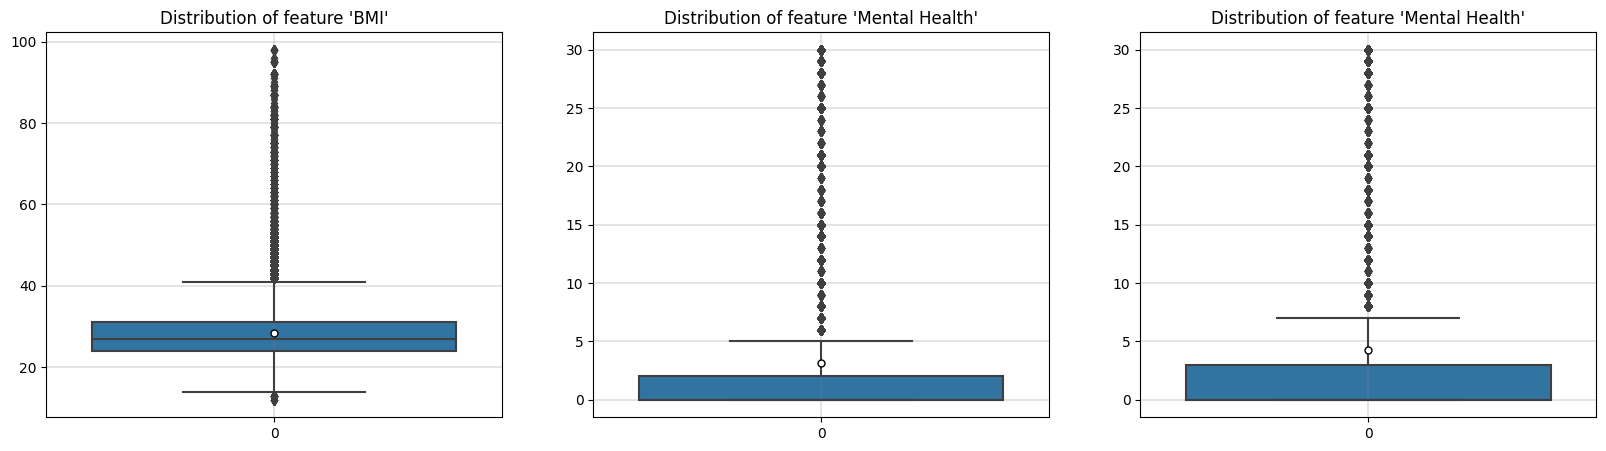

In [18]:
# Box plots of features with suspected outliers:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(20, 5))

# BMI:
plt.subplot(1,3,1)
sb.boxplot(df_numerical['BMI'],
           showmeans = True,
           meanprops={"marker":"o",
                      "markerfacecolor":"white",
                       "markeredgecolor":"black",
                      "markersize":"5"}
                      )

plt.grid(color = "grey", linewidth = "0.3", linestyle = "-")
plt.title("Distribution of feature 'BMI'")

# Education:
plt.subplot(1,3,2)
sb.boxplot(df_numerical['MentHlth'],
           showmeans = True,
           meanprops={"marker":"o",
                      "markerfacecolor":"white",
                       "markeredgecolor":"black",
                      "markersize":"5"}
                      )

plt.grid(color = "grey", linewidth = "0.3", linestyle = "-")
plt.title("Distribution of feature 'Mental Health'")

# Physical Health:
plt.subplot(1,3,3)
sb.boxplot(df_numerical['PhysHlth'],
           showmeans = True,
           meanprops={"marker":"o",
                      "markerfacecolor":"white",
                       "markeredgecolor":"black",
                      "markersize":"5"}
                      )

plt.grid(color = "grey", linewidth = "0.3", linestyle = "-")
plt.title("Distribution of feature 'Mental Health'")


As shown in the BoxPlot diagrams, many values lie above the last quartile.

In the case of *PhysHlth* and *MntlHlth* this values lie within the maximum possible value of each feature, which correspond to the worst possible autoperceived states of mental and physical health. Because it is known that bad health condition influences Diabetes and the values are within the possible ranges, this outliers will remain in following analyses.<br>
However, *BMI* technically has no upper and lower limit since it is a relation between weight and height, even though values over 30 kg/m$^{2}$ indicate obesity, and below 18.5 kg/m$^{2}$ underweight. Once again, because it is known that *BMI* has a major effect on the development of Diabetes, it has been considered that the wide range of values reflects the reality of one of the most important factors in Diabetes, and hence, no outliers will be deleted.

Source:<br>
https://www.cdc.gov/pcd/issues/2019/19_0109.htm <br>
https://www.cdc.gov/healthyweight/assessing/index.html

***Improvements in repetitions of the cycle***<br>
In posterior steps the data is scaled with a MinMax Scaler. In order not to collapse BMI values between 20 and 40 to a small range, BMI values over 60kg/m$^{2}$ will be transformed to 60kg/m$^{2}$. BMI = 60 kg/m$^{2}$ still mean acute obesity, but the outlier breach will be reduced.

(At first the maximum limit was considered 41kg/m$^{2}$ (last quartile in the box-plot), but these values represent almost 4% of the total data, and a saturation artifact at BMI=41 would have been created.)

In [19]:
print("Percentage of data with 'BMI' over 41")
num_of_outliers = df_numerical['BMI'][df_numerical['BMI']>41].count()
total_data = df.shape[0]
percentage_of_outliers = (num_of_outliers/total_data) * 100
print(round(percentage_of_outliers, 2),"% of the total data are outliers regarding the feature 'BMI'.")

Percentage of data with 'BMI' over 41
3.87 % of the total data are outliers regarding the feature 'BMI'.


In [20]:
print("Percentage of data with 'BMI' over 60")
num_of_outliers = df_numerical['BMI'][df_numerical['BMI']>60].count()
total_data = df.shape[0]
percentage_of_outliers = (num_of_outliers/total_data) * 100
print(round(percentage_of_outliers, 2),"% of the total data are outliers regarding the feature 'BMI'.")

Percentage of data with 'BMI' over 60
0.32 % of the total data are outliers regarding the feature 'BMI'.


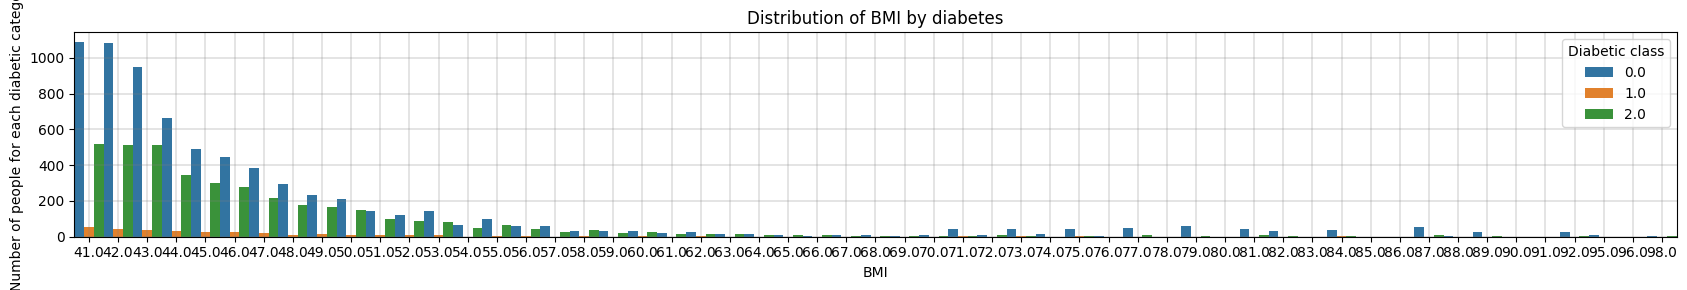

In [21]:
# BMI by diabetes category
selected_max = 40

# Set the figure size
plt.figure(figsize=(17, 3))

bplot = sb.countplot(data=df.loc[df['BMI'] > selected_max,],
                     x="BMI",
                     hue="Diabetes_012",
                     width=1
                     )

plt.title("Distribution of BMI by diabetes")
plt.ylabel("Number of people for each diabetic category")
plt.grid(color = "grey", linewidth = "0.3", linestyle = "-")

# add legend and set position to upper right
plt.legend(title="Diabetic class", loc='upper right');
plt.tight_layout()

Transformations of outliers for *BMI*:

In [22]:
#Transformation of the outliers into selected MAX value.
selected_max = 60
df.loc[df['BMI'] > selected_max, 'BMI'] = selected_max

# Max value of "BMI" after transformation of outliers:
print("Maximum value of 'BMI' feature after transformation: ", df["BMI"].max())

Maximum value of 'BMI' feature after transformation:  60.0


## Data reduction

### Removing duplicates in rows:


When searching for duplicated data and removing them, it is observed that the remaining dataset has different characteristics (e.g. maximum values). As the duplicated rows represent a significant amount of the data (close to 10%), it is worth to check the distribution of the remaining dataset and compare it to the prior.
Duplicated data could only be apparent due to the continuous numerical variables grouped beforehand, and even due to the revalue of outliers in "BMI" feature. With this comparison between distributions, apparent duplicated rows can be spotted.

In [23]:
originalRows_df = df.copy()
df.drop_duplicates(inplace=True)
df.describe()

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
count,229772.000000,229772.000000,229772.000000,229772.000000,229772.000000,229772.000000,229772.000000,229772.000000,229772.000000,229772.000000,...,229772.000000,229772.000000,229772.000000,229772.000000,229772.000000,229772.000000,229772.000000,229772.000000,229772.000000,229772.000000
mean,0.325640,0.454459,0.441768,0.959534,28.628410,0.465675,0.044757,0.103220,0.733344,0.612955,...,0.946073,0.092814,2.601179,3.505510,4.675361,0.185514,0.439222,8.086699,4.980529,5.890300
std,0.724634,0.497923,0.496599,0.197050,6.426984,0.498821,0.206771,0.304246,0.442212,0.487075,...,0.225875,0.290172,1.064691,7.713845,9.046697,0.388715,0.496293,3.093776,0.992894,2.092477
min,0.000000,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,1.000000,24.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,6.000000,4.000000,5.000000
50%,0.000000,0.000000,0.000000,1.000000,27.000000,0.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,8.000000,5.000000,6.000000
75%,0.000000,1.000000,1.000000,1.000000,32.000000,1.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,3.000000,2.000000,4.000000,0.000000,1.000000,10.000000,6.000000,8.000000
max,2.000000,1.000000,1.000000,1.000000,60.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,13.000000,6.000000,8.000000


In [24]:
print("Number of rows prior to data reduction: ", originalRows_df.shape[0])
print("Number of rows after data reduction: ", df.shape[0])
print(round(((originalRows_df.shape[0]-df.shape[0])/originalRows_df.shape[0])*100, 2), "% of data was duplicated")

Number of rows prior to data reduction:  253680
Number of rows after data reduction:  229772
9.42 % of data was duplicated


Comparison of the distributions for each feature with and without duplicated rows is carried out:

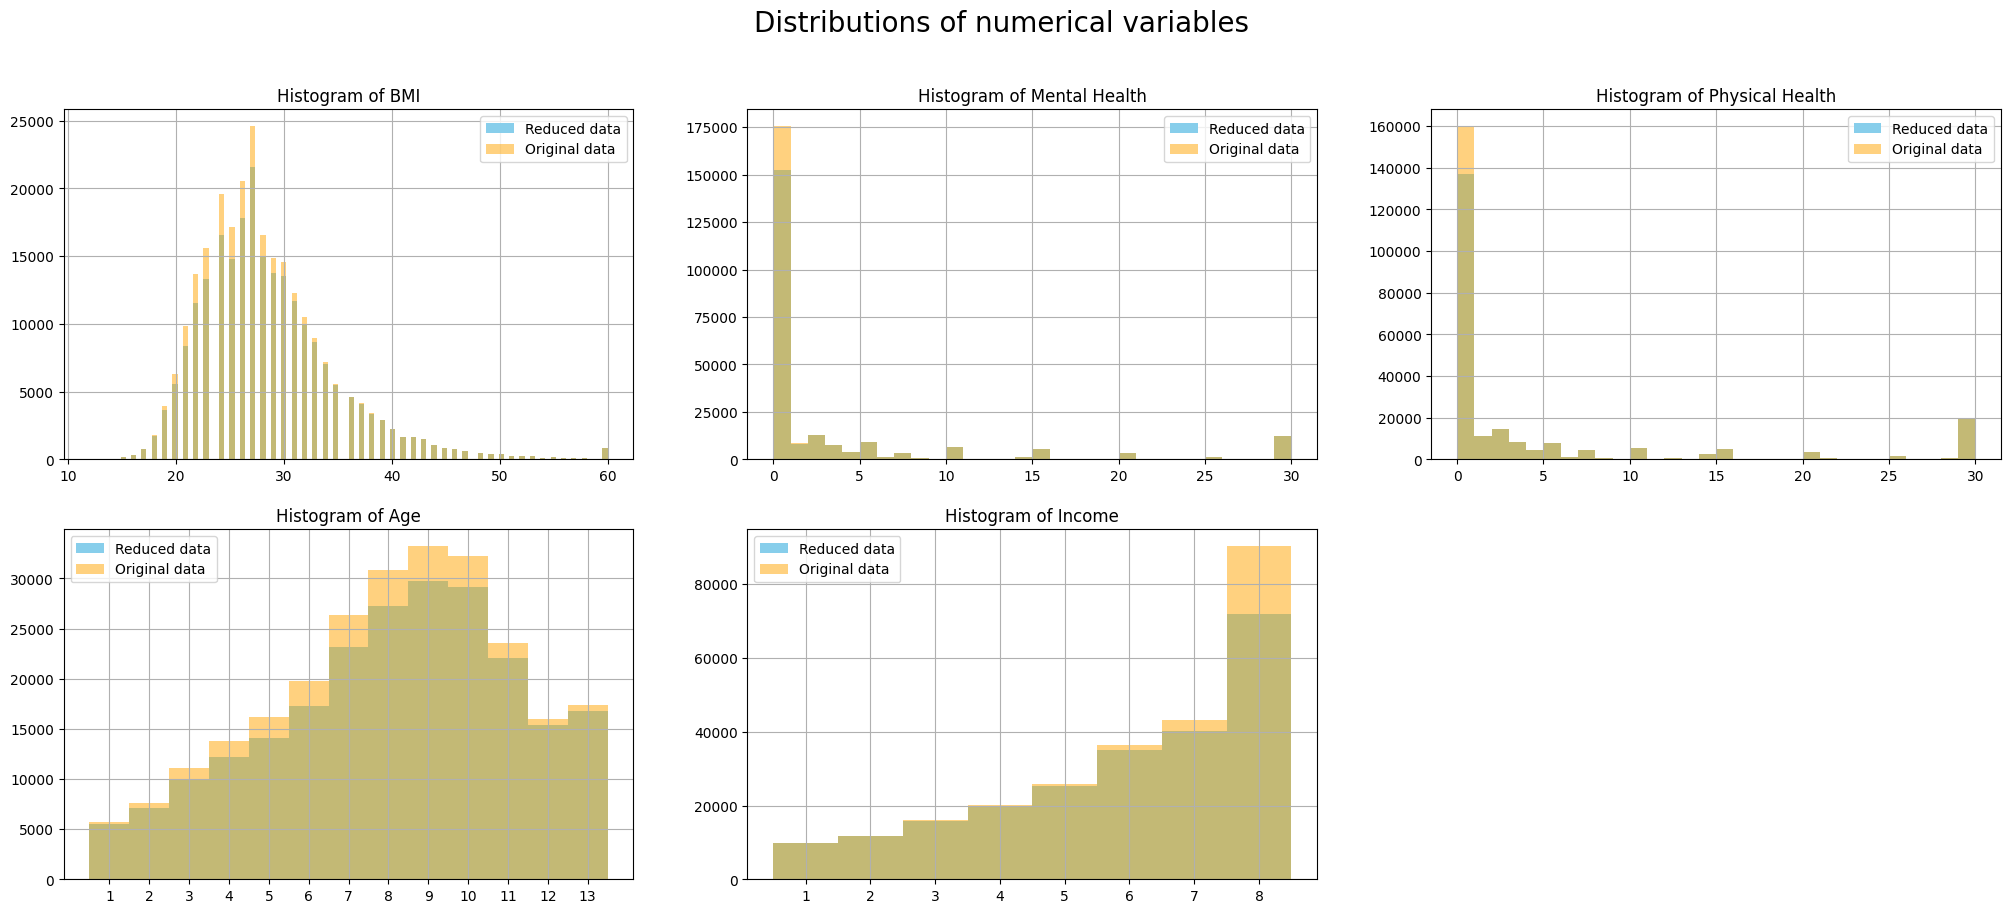

In [25]:
df_numerical = df[['BMI','MentHlth','PhysHlth','Age','Income']]

# Creation of subplots:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(25, 10))

# Flatten the axes array to a 1D array
axes = axes.flatten()#Converting the 2D array of axes objects into a 1D array.
                     #Useful when you want iterating over the subplots,
                     #regardless of whether there is one row or multiple rows.

# Remove empty subplot in row 2, column 3 because it is empty
fig.delaxes(axes[-1])

# Specifications for each subplot
# Subplot for BMI:
axes[0].hist(df_numerical['BMI'], bins=100, color='skyblue', label = "Reduced data")
axes[0].hist(originalRows_df['BMI'], bins=100, color='orange', alpha=0.5, label = "Original data")
axes[0].set_title('Histogram of BMI')
axes[0].legend()
axes[0].grid(True)

# Subplot for MentHlth:
axes[1].hist(df_numerical['MentHlth'], bins=30, color='skyblue', label = "Reduced data")
axes[1].hist(originalRows_df['MentHlth'], bins=30, color='orange', alpha=0.5, label = "Original data")
axes[1].set_title('Histogram of Mental Health')
axes[1].legend()
axes[1].grid(True)

# Subplot for PhysHlth:
axes[2].hist(df_numerical['PhysHlth'], bins=30, color='skyblue', label = "Reduced data")
axes[2].hist(originalRows_df['PhysHlth'], bins=30, color='orange', alpha=0.5, label = "Original data")
axes[2].set_title('Histogram of Physical Health')
axes[2].legend()
axes[2].grid(True)

# Subplot for Age:
axes[3].hist(df_numerical['Age'], bins=np.arange(0.5, 14, 1), color='skyblue', label = "Reduced data")
axes[3].hist(originalRows_df['Age'], bins=np.arange(0.5, 14, 1), color='orange', alpha=0.5, label = "Original data")
axes[3].set_title('Histogram of Age')
axes[3].legend()
axes[3].set_xticks(np.arange(1, 14, 1))  # Set custom xticks
axes[3].grid(True)

# Subplot for Income:
axes[4].hist(df_numerical['Income'], bins=np.arange(0.5, 9, 1), color='skyblue', label = "Reduced data")
axes[4].hist(originalRows_df['Income'], bins=np.arange(0.5, 9, 1), color='orange', alpha=0.5, label = "Original data")
axes[4].set_title('Histogram of Income')
axes[4].legend()
axes[4].grid(True)

# Adjust layout
# plt.tight_layout()
plt.suptitle("Distributions of numerical variables", fontsize=20)
plt.show()

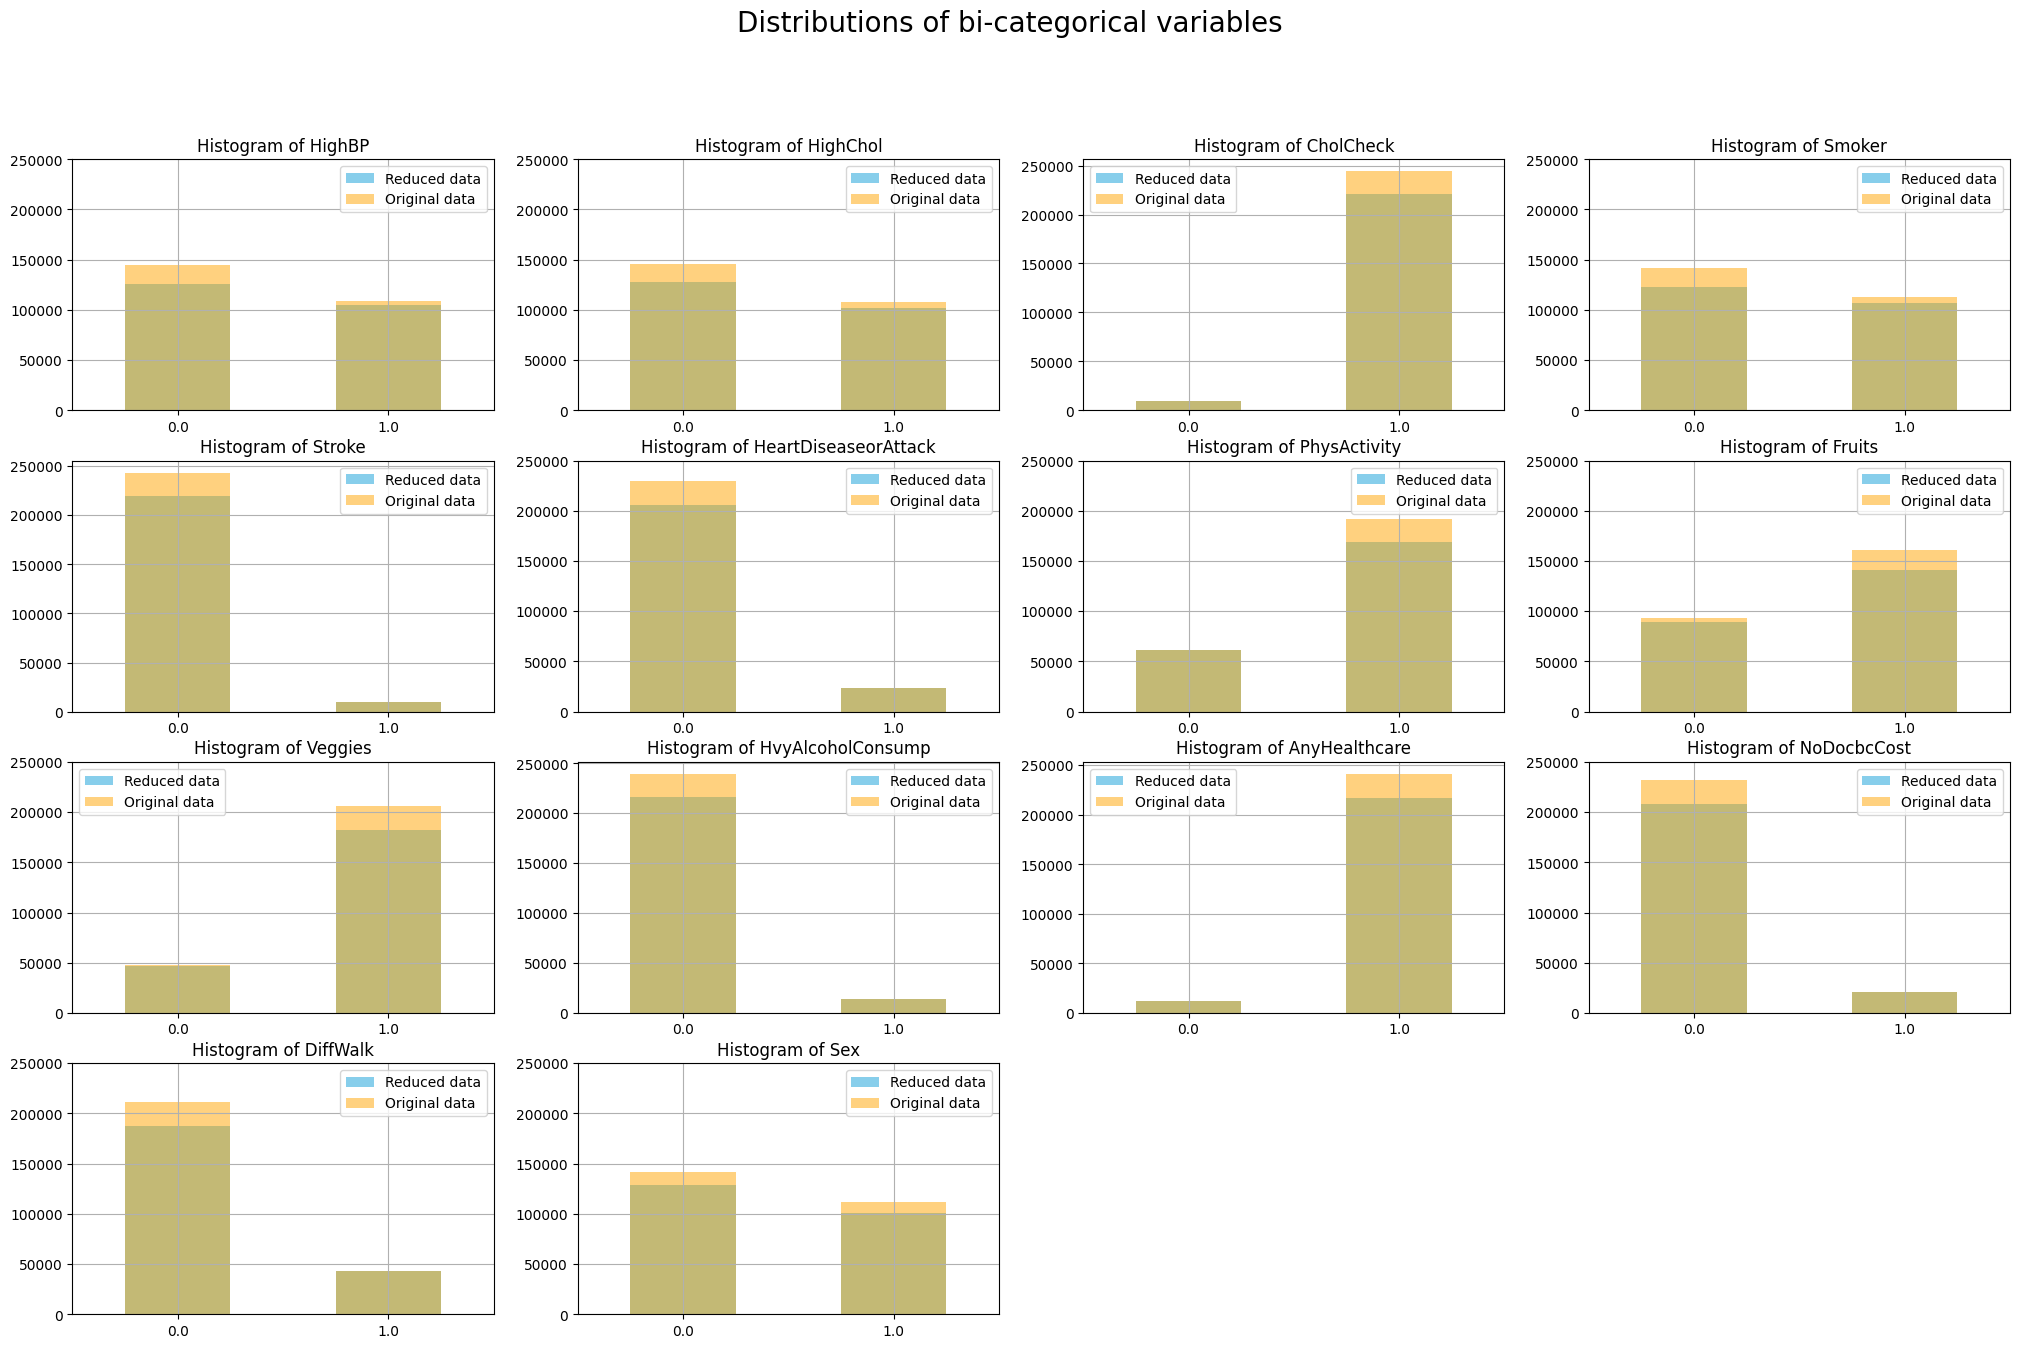

In [26]:
# BI-CATEGORICAL VARIABLES:
df_biCategorical = df[['HighBP','HighChol','CholCheck','Smoker','Stroke','HeartDiseaseorAttack','PhysActivity','Fruits','Veggies','HvyAlcoholConsump','AnyHealthcare','NoDocbcCost','DiffWalk','Sex']]

# Creation of subplots:
fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(25, 15)) #'axes' is an array with two elements, 2D.
                                                            # Each 'axes' object represents one subplot.

# Flatten the axes array to a 1D array
axes = axes.flatten()#Converting the 2D array of axes objects into a 1D array.
                     #Useful when you want iterating over the subplots,
                     #regardless of whether there is one row or multiple rows.

# Remove empty subplot in row 2, column 3 because it is empty
fig.delaxes(axes[-2])
fig.delaxes(axes[-1])

for i, feature in enumerate(df_biCategorical.columns):
    ax = axes[i]
    df_biCategorical[feature].value_counts().sort_index().plot(kind='bar', color='skyblue', ax=ax, label="Reduced data")
    originalRows_df[feature].value_counts().sort_index().plot(kind='bar', color='orange', ax=ax, alpha=0.5, label="Original data")
    ax.set_title(f'Histogram of {feature}')
    ax.set_xlabel('')
    ax.legend()
    # Rotate x-axis labels
    ax.set_xticklabels(ax.get_xticklabels(), rotation=0)
    ax.set_yticks(np.arange(0, 300000, 50000))
    ax.grid(True)

# Adjust layout
plt.suptitle("Distributions of bi-categorical variables", fontsize=20)
#plt.tight_layout()
plt.show()

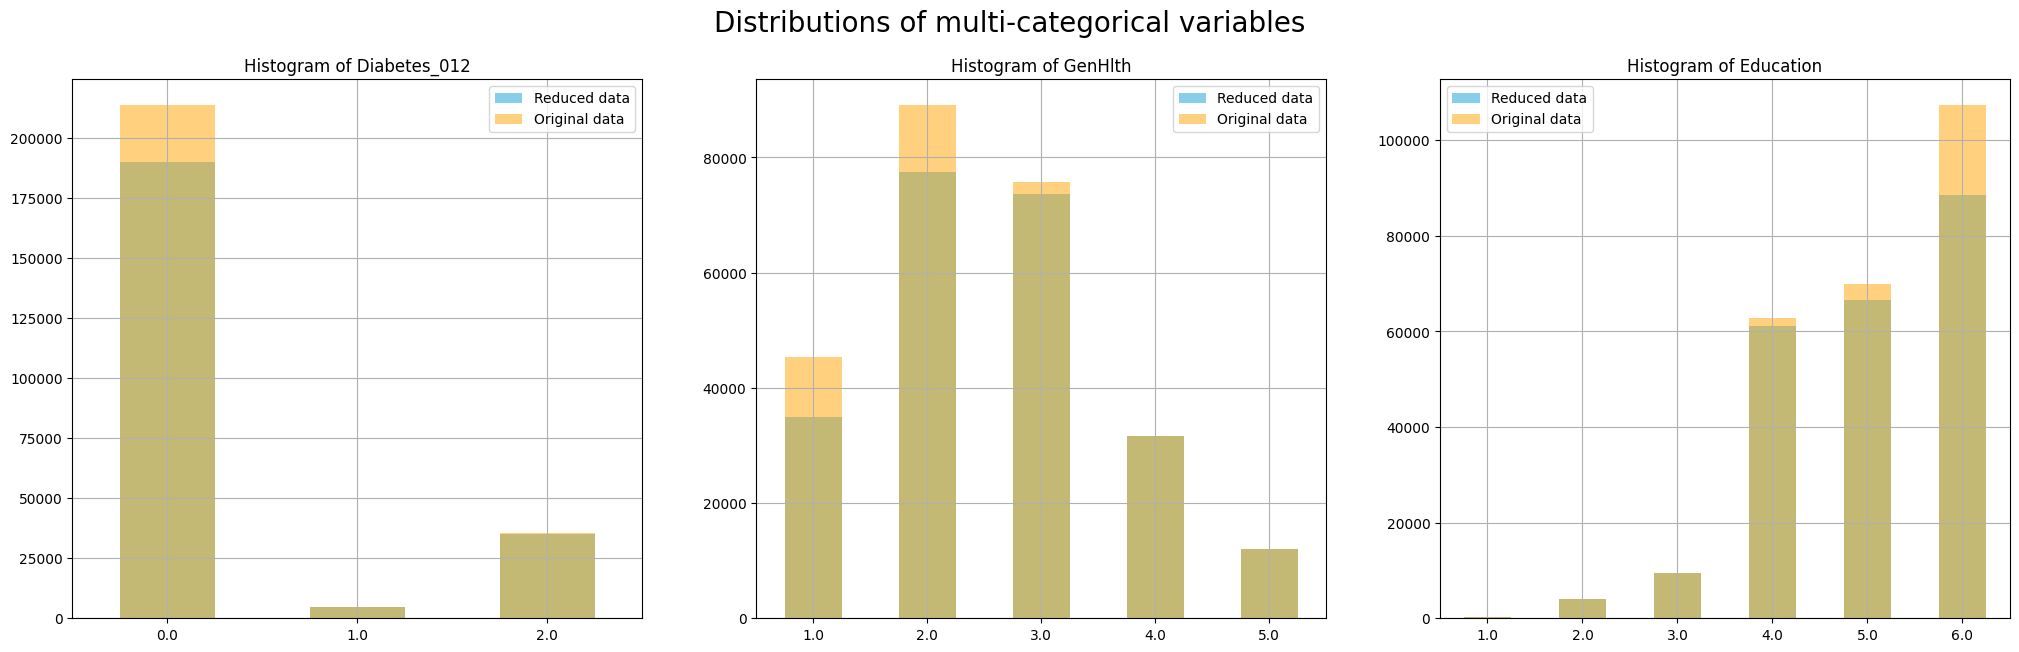

In [27]:
df_multiCategorical = df[['Diabetes_012','GenHlth','Education']]

# Creation of subplots:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(25, 7)) #'axes' is an array with two elements, 2D.
                                                            # Each 'axes' object represents one subplot.

for i, feature in enumerate(df_multiCategorical.columns):
    ax = axes[i]
    df_multiCategorical[feature].value_counts().sort_index().plot(kind='bar', color='skyblue', ax=ax, label="Reduced data")
    originalRows_df[feature].value_counts().sort_index().plot(kind='bar', color='orange', ax=ax, alpha=0.5, label="Original data")
    ax.set_title(f'Histogram of {feature}')
    ax.set_xlabel('')
    ax.legend()
    # Rotate x-axis labels
    ax.set_xticklabels(ax.get_xticklabels(), rotation=0)
    ax.grid(True)

# Adjust layout
#plt.tight_layout()
plt.suptitle("Distributions of multi-categorical variables", fontsize=20)
plt.show()

After showing this graphs, it can be noted that most of the duplicated data to be deleted belong to the most frequent categories in each feature. This supports the hypothesis of apparent duplicated data because data of the prior grouping of numerical variables.

***Improvements in repetitions of the cycle***<br>
After comparing evaluation metrics in models, it was confirmed that models performed better when trained with a complete dataset.

In [28]:
df = originalRows_df

### Dimensionality reduction:  
**General Strategy**<br>
Because of the difficulty of removing features based on domain knowledge, the dataset will be split in 2 copies:
* One copy will mantain the original features (namely, *df*).
* Other copy will be subjected to the dimensionality reduction (namely, *df_reduced*).

This way, the performance of models for diagnostics can be explore with the original data and with the manually reduced data.

To have a first look to correlation between features, a heatmap of the dataset is plotted.

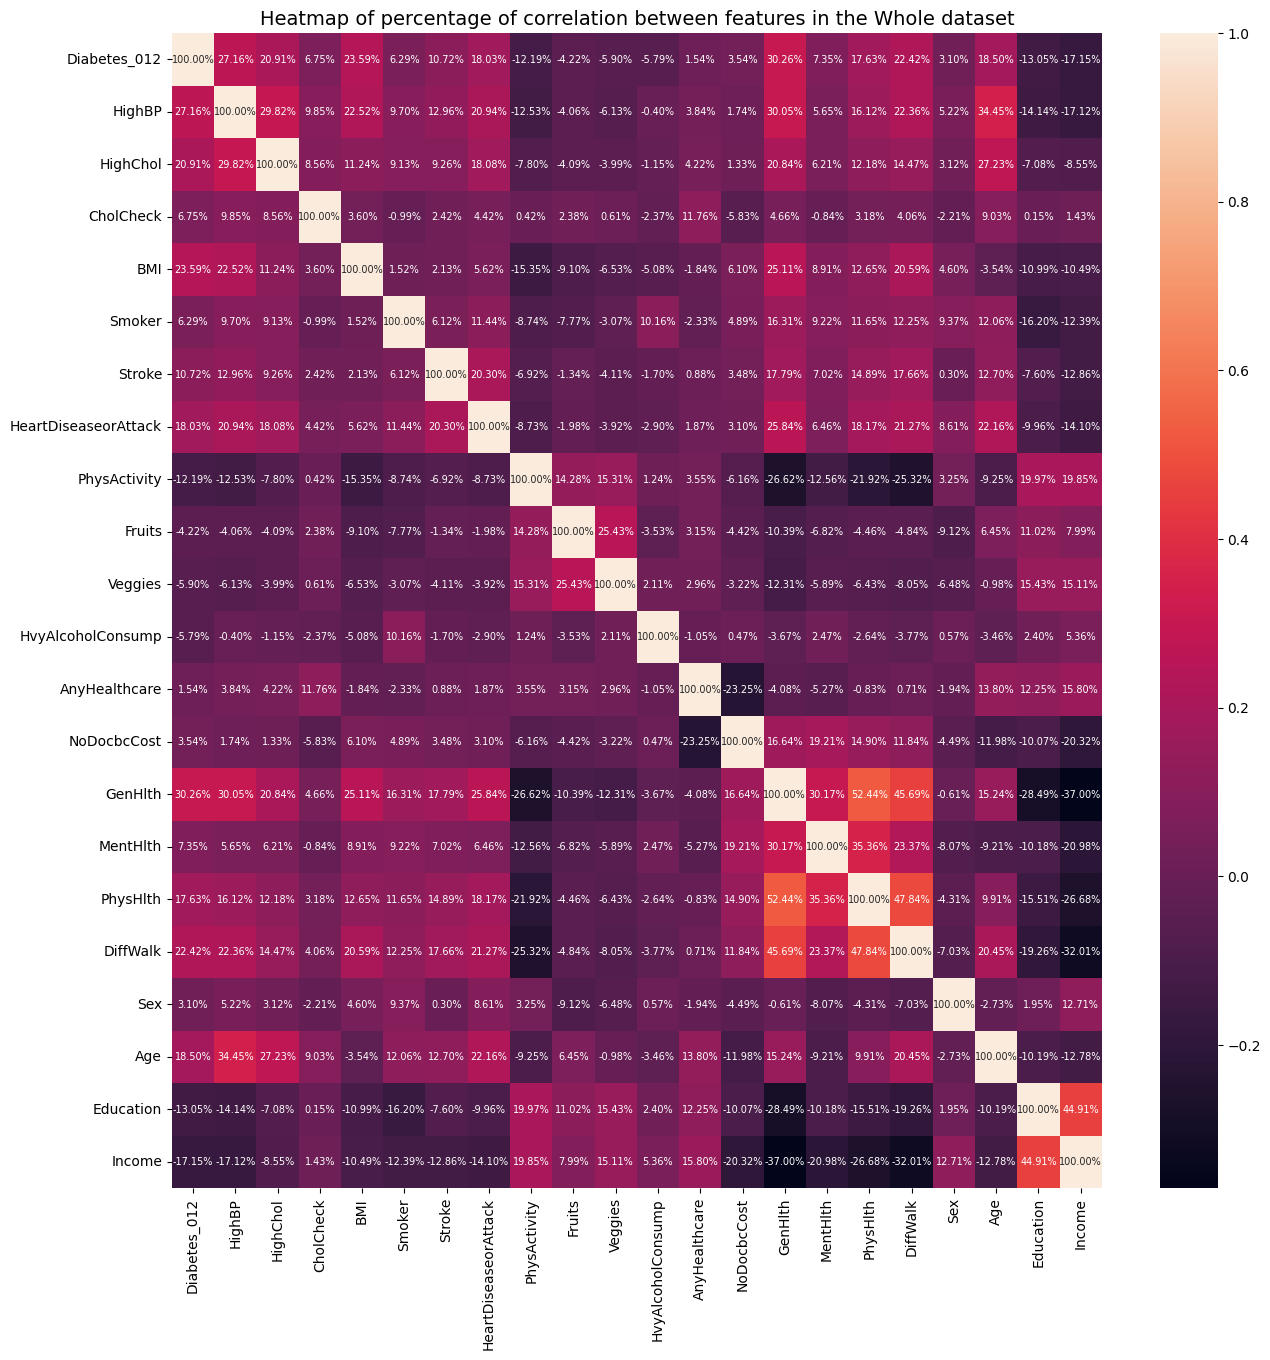

In [29]:
plt.figure(figsize=(15, 15))
sb.heatmap(df.corr(), annot=True, fmt='.2%', annot_kws={'size': 7})
plt.title('Heatmap of percentage of correlation between features in the Whole dataset', fontsize=14);

In [30]:
df_reduced = df.copy()

#### Removing uncorrelated features:
A first approach to remove uncorrelated features will be selecting those with very little correlation with all the rest of variables.

Function *chooseNoCorrFeatures* selects the features where correlation value with the rest features is under a certain treshold.

In [31]:
def chooseNoCorrFeatures(corr_treshold, *dataframes):
    """
    Returns a list of features from the datframe,
    that correlate with the rest with values below
    the treshold.
    Parameters:
    > *dataframe: various Dataframes to apply the function
    > corr_treshold: float of maximum correlation
    """
    list_of_feat = []
    for dataframe in dataframes:
        # Ensure that the input is a DataFrame
        if not isinstance(dataframe, pd.DataFrame):
            raise ValueError("Input must be a pandas DataFrame")

        # Transformations to the correlation matrix:
        corr_values = dataframe.corr().abs()
        # Mask the diagonal elements
        np.fill_diagonal(corr_values.values, 0)

        # Choosing features with under a correlation treshold:
        features_noCorr = (corr_values <= corr_treshold).all(axis=1)
        arrayFeat = features_noCorr.index[features_noCorr]
        list_of_feat.extend(arrayFeat)

    return list_of_feat


In [32]:
#List of thresholds for low correlation:
low_corr = [0.07, 0.1, 0.11, 0.12, 0.15, 0.17, 0.2]

for thrs in low_corr:
    feats = chooseNoCorrFeatures(thrs, df)
    print(f"Features with a correlation <{thrs} :{feats}")

Features with a correlation <0.07 :[]
Features with a correlation <0.1 :[]
Features with a correlation <0.11 :['HvyAlcoholConsump']
Features with a correlation <0.12 :['CholCheck', 'HvyAlcoholConsump']
Features with a correlation <0.15 :['CholCheck', 'HvyAlcoholConsump', 'Sex']
Features with a correlation <0.17 :['CholCheck', 'Smoker', 'HvyAlcoholConsump', 'Sex']
Features with a correlation <0.2 :['CholCheck', 'Smoker', 'HvyAlcoholConsump', 'Sex']


The threshold of low correlation $0.20$ was considered the limit of low correlation.<br>
Although $0.15$ and $0.17$ are low correlation values under this criteria, the relation of sex and smoking with diabetes has been confirmed by a number of studies.<br>
For values of $< 0.12$ of correlation, there are'*CholCheck*' (having had a cholesterol check in the last 5 years) and '*HvyAlcoholConsump*' (being a heavy drinker). Besides the low correlation with the other variables, these features are remarkably imbalance features. Still, there are known relations between them and Diabetes.

Because of this, '*CholCheck*' and '*HvyAlcoholConsump*' are further study to determine if they can be removed without sever consequences, based on domain knowledge.

Source:<br>
https://academic.oup.com/edrv/article/37/3/278/2354724


**Checking correlation to the rest of variables**:

In [33]:
features_no_corr = chooseNoCorrFeatures(0.12, df)

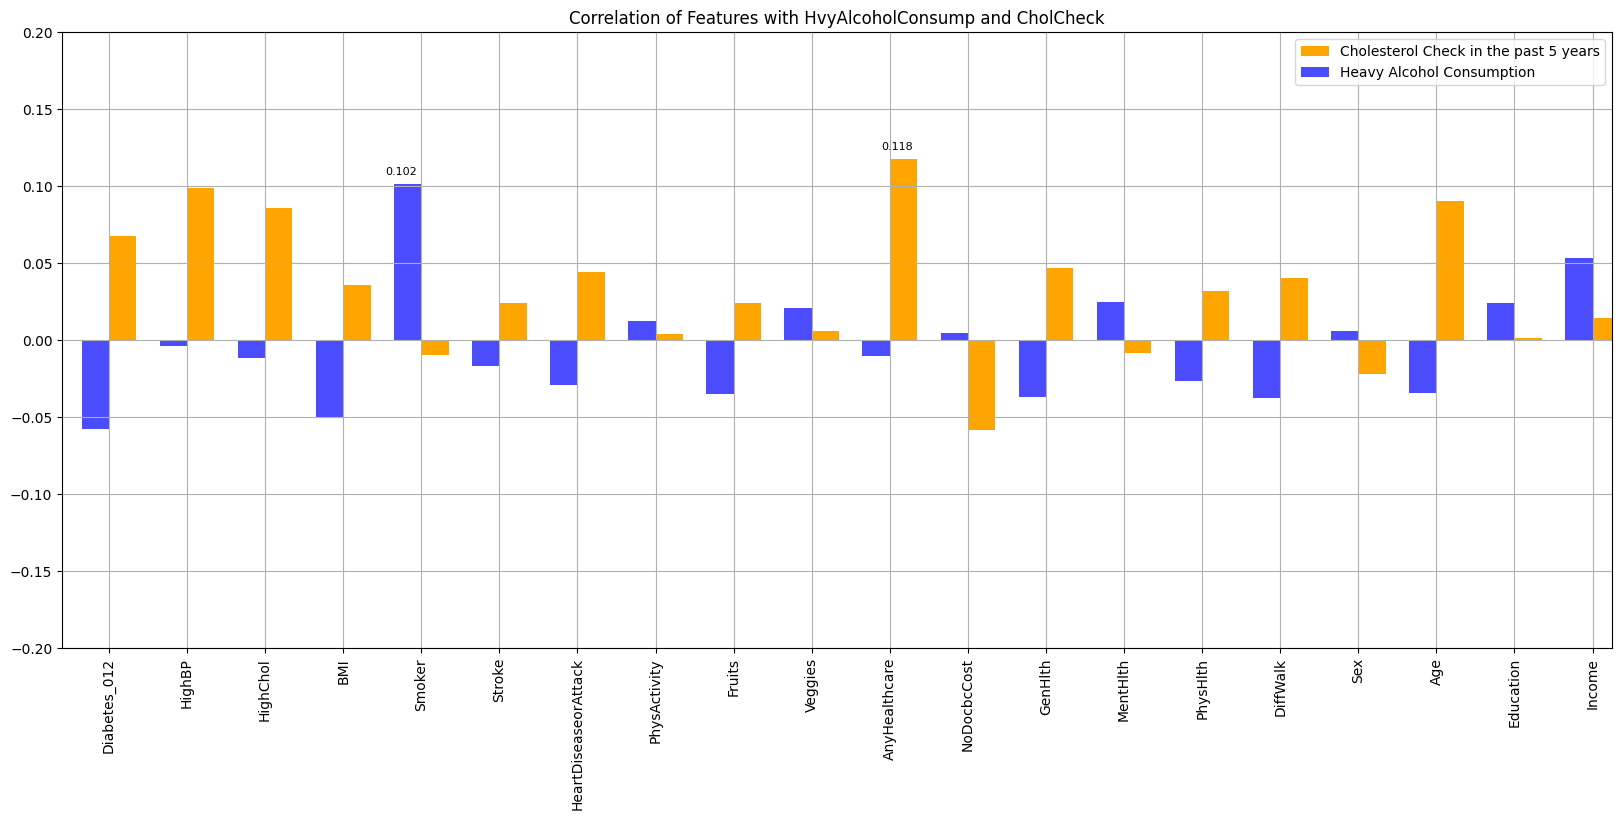

In [34]:
# Max correlations of each variable to study:
max_c_index=[] # index for the max value of correlations
max_c_value=[] # values for the max value of correlations

# Compute correlations
corr=[] # list of values of correlations
for feat in features_no_corr:
    corr.append(df.drop(features_no_corr, axis=1).corrwith(df[feat]))
    name_feat_max_c = df.corr()[feat].replace(1,np.nan).abs().idxmax()
    max_c_index.append(df.corr()[feat].index.get_loc(name_feat_max_c))
    max_c_value.append(df.corr()[feat].replace(1,np.nan).abs().max())

# Plot both correlations in the same graph
fig, ax = plt.subplots(figsize=(20, 8))

# Set the positions of the x-axis ticks
indices = np.arange(len(corr[0]))
indices_alcohol = [i + 0.35 for i in indices]


corr[0].plot(kind='bar', grid=True, width=0.35, color="Orange", label="Cholesterol Check in the past 5 years", position=0)
corr[1].plot(kind='bar', grid=True, width=0.35, color="Blue", label="Heavy Alcohol Consumption", position=1, alpha=0.7)
plt.title("Correlation of Features with HvyAlcoholConsump and CholCheck")
# Set x-axis ticks and labels
ax.set_xticklabels(corr[0].index)

# Set annotations to the bars of maximum correlations
ax.annotate(f'{max_c_value[0]:.3f}', (indices[max_c_index[0]]-2, max_c_value[0]),
            xytext=(5, 5), textcoords='offset points', ha='center', va='bottom', fontsize=8)
ax.annotate(f'{max_c_value[1]:.3f}', (indices_alcohol[max_c_index[1]]-2*0.35-1, max_c_value[1]),
            xytext=(5, 5), textcoords='offset points', ha='center', va='bottom', fontsize=8)

# Set y-axis limits
ax.set_ylim(bottom=-0.2, top=0.2)  # Adjust the limits as needed
# Add legend
plt.legend()

# Show the plot
plt.show()

It can be observed that, the other features to which each they correlate most, can account for their small effect on the Diabetes diagnosis:

* 'CholCheck':
    The feature has higher correlation with **having a health insurance**, those with health insurance are more prone to have cholesterol checked.

    Also, it has higher correlation with attributes related to heart conditions: people who undergo a cholesterol check do so because they have the knowledge of being at risk of having a higher cholesterol.

* 'HvyAlcoholConsump':
    The feature has higher correlation with **being or have been a smoker**, due to the fact that smoking is another unhealthy habit associated to drinking. Even so, 'Smoker' has a greater correlation to diabetes.

**Checking distribution of each of these features by Diabetes illness:**<br>
It can be seen that both features exhibit a noticeable increased number of Diabetic diagnosis with respect to the most populated category. In fact, the increase in variables "CholCheck" and "HvyAlcoholConsump" are significant.

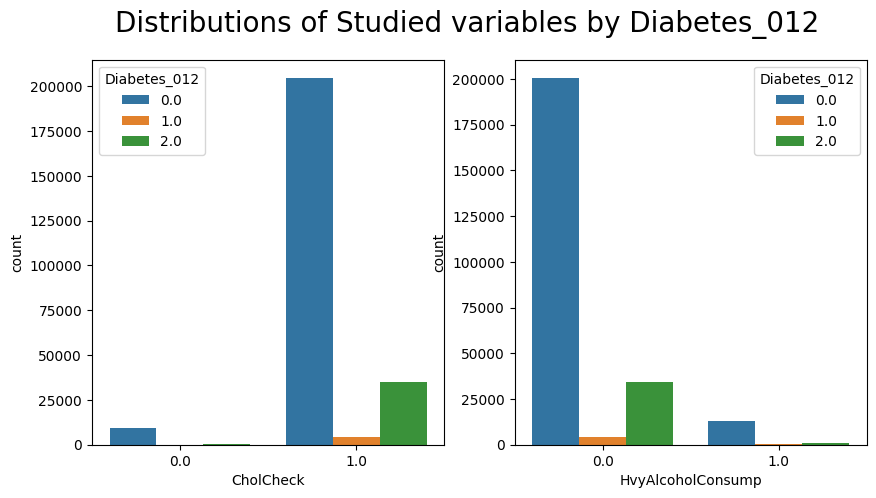

In [35]:
# Creation of subplots:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))

# Flatten the axes array to a 1D array
axes = axes.flatten()#Converting the 2D array of axes objects into a 1D array.
                     #Useful when you want iterating over the subplots,
                     #regardless of whether there is one row or multiple rows.

sb.countplot(data=df, x="CholCheck", hue="Diabetes_012", ax=axes[0])

sb.countplot(data=df, x="HvyAlcoholConsump", hue="Diabetes_012", ax=axes[1])

# Adjust layout
# plt.tight_layout()
plt.suptitle("Distributions of Studied variables by Diabetes_012", fontsize=20)
plt.show()

In order to statistically confirm wether 'CholCheck' and 'HvyAlcoholConsump' are related to 'Diabetes_012' significantly, the statistical test of Chi-Square is performed.

Source:<br>
[Chi-square test](https://www.jmp.com/en_se/statistics-knowledge-portal/chi-square-test/chi-square-test-of-independence.html)


In [36]:
def chi_square_test(data, class_column, type_column):
    """
    Perform chi-square tests for each data type in the given dataset.

    Parameters:
    - data: Pandas DataFrame containing the dataset.
    - class_column: Name of the column containing class labels ("yes" or "no").
    - type_column: Name of the column containing data types (1, 2, 3).

    Returns:
    - results: A dictionary containing chi-square test results for each type.
    """

    results = {}

    # Create a contingency table for each data type
    for data_type in data[type_column].unique():
        contingency_table = pd.crosstab(data[class_column], data[type_column] == data_type)
        # Perform chi-square test
        chi2, p, _, _ = chi2_contingency(contingency_table)
        # Store the results
        alpha = 0.05
        if p <= alpha:
            # The null hypothesis of no association between the variables is
            # rejected
            print(f"Diabetes class {data_type} has a significant association with {type_column}")
        else:
            # There is not enough evidence to reject null hypothesis of no
            # association between the variables rejected.
            print(f"Diabetes class {data_type} has NO significant association with {type_column}")
        results[data_type] = {'chi2': chi2, 'p-value': p}

    return results


In [37]:
chi_square_test(df, 'CholCheck', 'Diabetes_012')

Diabetes class 0.0 has a significant association with Diabetes_012
Diabetes class 2.0 has a significant association with Diabetes_012
Diabetes class 1.0 has a significant association with Diabetes_012


{0.0: {'chi2': 1167.849165286961, 'p-value': 5.924497378792127e-256},
 2.0: {'chi2': 1062.9381436620106, 'p-value': 3.7513988789188705e-233},
 1.0: {'chi2': 74.56705096762802, 'p-value': 5.8613335234262796e-18}}

In [38]:
chi_square_test(df, 'HvyAlcoholConsump', 'Diabetes_012')

Diabetes class 0.0 has a significant association with Diabetes_012
Diabetes class 2.0 has a significant association with Diabetes_012
Diabetes class 1.0 has a significant association with Diabetes_012


{0.0: {'chi2': 814.3739481993872, 'p-value': 4.045204782238624e-179},
 2.0: {'chi2': 825.1187559262196, 'p-value': 1.8659318101056406e-181},
 1.0: {'chi2': 11.104760240113217, 'p-value': 0.0008610642021388837}}

***Improvements in repetitions of the cycle***<br>
For each feature, it is checked visually after resampling steps that they are indeed significant in the diagnosis of Diabetes. This can be observed in the Appendix section, Cell 1.
The distributions of each low correlated featured by diabetes diagnosis have been plotted for the new imbalanced datasets created in posterior actions.

 Still, information provided by these features for Diabetes diagnosis can be explained by information in other features. Additionally, the imbalance in both features is very large (very few people are Heavy drinkers or have not had a Cholesterol check in the past 5 years), and consequently it is highly improbable that *CholCheck* and *HvyAlcoholConsump* can serve notably in the purpose of Diabetes diagnosis.

IN CONLUSION:
*CholCheck* and *HvyAlcoholConsump* are very imbalanced features, whose diabetes-associated values have very low frequencies. Furthermore, they are very low correlated to the target variable, and to some extent, the information they is mirrored by other factors. Becaus of this, they are both dropped.

In [39]:
df_reduced.drop(labels=features_no_corr, axis=1, inplace=True)
print("New shape of the reduced dataset: ", df_reduced.shape)

New shape of the reduced dataset:  (253680, 20)


In [40]:
# # Age by diabetes category
# age_order = range(1, 14, 1)
# bplot = sb.countplot(data=df,
#             x="Age",
#             hue="Diabetes_012",
#             order=age_order
#             )

# plt.title("Distribution of Diabetes by Age")
# plt.ylabel("Number of people for each diabetic category")
# plt.grid(color = "grey", linewidth = "0.3", linestyle = "-")
# # Set custom x-axis labels
# custom_labels = ['18-24', '25-29', '30-34', '35-39', '40-44', '45-49', '50-54', '55-59', '60-64', '65-69', '70-74', '75-79', '80+']
# plt.xticks(ticks=range(13), labels=custom_labels, rotation=45, ha='right')
# # add legend and set position to upper right
# plt.legend(title="Diabetic class", loc='upper right');

#### Removing irrelevant features:
Low correlated features to "Diabetes_012" will be selected. Before deleting them, their relation to other features will be checked, in order to decide if another variable can account for their effect in Diabetes diagnosis.

The features that correlate with "Diabetes_012" with values $< 0.15$ are selected.

In [41]:
# Features with correlation with "Diabetes_012" < 0.15
no_corr_diabetes = df_reduced.columns[(df_reduced.corr()["Diabetes_012"].abs()<0.15)]
print("Correlations of the least-related features to Diabetes: ")
df_reduced.corr()["Diabetes_012"][(df_reduced.corr()["Diabetes_012"].abs()<0.15)]

Correlations of the least-related features to Diabetes: 


Smoker           0.062914
Stroke           0.107179
PhysActivity    -0.121947
Fruits          -0.042192
Veggies         -0.058972
AnyHealthcare    0.015410
NoDocbcCost      0.035436
MentHlth         0.073507
Sex              0.031040
Education       -0.130517
Name: Diabetes_012, dtype: float64

A closer analysis of these features is conducted, selecting for each of them the attribute with most correlation.<br>

In [42]:
# Max correlation value of this features in the whole dataframe
max_values_ncd = df_reduced.corr().replace(1,np.nan).abs().describe().loc['max', no_corr_diabetes]

In [43]:
# Attributes to which they correlate the most.
intermediate_correlations=[]
for i, feature in enumerate(max_values_ncd.index):
    # for every index in max_values_ncd, find the column name where value
    # matches the value in max_values_ncd
    name = df_reduced.columns[df_reduced.corr().abs()[feature]==max_values_ncd[feature]].tolist()
    intermediate_correlations.append(name[0])

    print(feature," is most correlated to ", name[0]," with a correlation of ", round(max_values_ncd[i], 2))

Smoker  is most correlated to  GenHlth  with a correlation of  0.16
Stroke  is most correlated to  HeartDiseaseorAttack  with a correlation of  0.2
PhysActivity  is most correlated to  GenHlth  with a correlation of  0.27
Fruits  is most correlated to  Veggies  with a correlation of  0.25
Veggies  is most correlated to  Fruits  with a correlation of  0.25
AnyHealthcare  is most correlated to  NoDocbcCost  with a correlation of  0.23
NoDocbcCost  is most correlated to  AnyHealthcare  with a correlation of  0.23
MentHlth  is most correlated to  PhysHlth  with a correlation of  0.35
Sex  is most correlated to  Income  with a correlation of  0.13
Education  is most correlated to  Income  with a correlation of  0.45


First of all, in light of these results and thanks to the understanding of the meaning of all these features, **it is possible to intuitively sense a direct relation to the feature "GenHlth"**, a variable that collects the subjective rate of each person's General Health.<br>
Not only "GenHlth" groups the effect of a high number of other features, masking their individual effect on "Diabetes_012", but additionally, the feature is highly general and subjective. This will be studied in following steps.

Second of all, it is observed that most of these variables with few relation to "Diabetes_012" **are most correlated between each other**.

##### Selection of irrelevant features:
* **'AnyHealthcare'** is poorly correlated to Diabetes, and it is most related to 'NoDocbcCost' (not seeing a doctor in the previous year because of cost).
* Likewise, **'NoDocbcCost'** is poorly correlated to Diabetes, and it is most related to 'AnyHealthcare' (not having insurance).

IN CONLUSION: It is clear that these features depend on the "Income" of each person, and additionally, data for both features is very imbalanced. Because in this case, a causality between these features and another variable in the assessment of risk for diabetes can be stablished, both **'AnyHealthcare'** and  **'NoDocbcCost'** will be dropped.

* **'Smoker'**, has low correlation with Diabetes but seems to have an impact in feature 'GenHlth'. It must be noted that balance is not imbalance for this feature.
* **'PhysActivity'** has low correlation with Diabetes, and a is fairly imbalanced, too. However, again, it is most correlated with 'GenHlth'.
* **'MentHlth'** (days in the past month in which one's mental health was bad) has, in the same way, a logic relation with "GenHlth" based in domain knowledge.

IN CONCLUSION: Until the attribute "GenHlth" is studied, these features will be kept.

* **'Stroke'"** has low correlation with Diabetes, too. It a very imbalanced feature, and because they are caused by a shortage of blood in the brain, they can be related to cardiac attacks, where there is a shortage of blood in the heart (hence the correlation with 'HeartDiseaseorAttack').

* **'Sex'** has a low correlation to Diabetes in this dataset, but research shows that its role in Diabetes is clear.

IN CONCLUSION: Due to the redundancy and imbalance of 'Stroke', only **'Stroke'** will be dropped.

* **'Fruits'** (fruit ingestion per day) is poorly correlated to Diabetes and it is most related to 'Veggies'.
* The same way, **'Veggies'** (vegetables ingestion per day) is poorly correlated to Diabetes and it is most related to 'Fruits'.

However, data for these features are not particularly imbalanced. And there is no other clear feature that can be regarded as a cause for values of these variables. Further analysis will be carried out.

In [44]:
df_reduced.drop(['AnyHealthcare', 'NoDocbcCost'], axis=1, inplace=True)
print("New shape of the reduced dataset: ", df_reduced.shape)

New shape of the reduced dataset:  (253680, 18)


In [45]:
df_reduced.drop(['Stroke'], axis=1, inplace=True)
print("New shape of the reduced dataset: ", df_reduced.shape)

New shape of the reduced dataset:  (253680, 17)


***Improvements in repetitions of the cycle***<br>
After more research on *Diabetes*, it was confirmed that the main way in which "Sex" influences *Diabetes mellitus* is through sexual dimorphsm in fat accumulation, in heart diseases developments, and according to recent studies, through sexual dimorphsm in response to alcohol, too.<br>
Features o the dataset do not reflect these differences, as the extremely low correlation of 'Sex' with other biological factors in the dataset that do affect Diabetes show. Because of this, **"Sex" will be dropped**: The feature's strongest correlation to another feature ("Income") exhibits a value of only $0.13$. This small correlation with Income can be accounted for by explanations other than biological.<br>
In further studies, different models for both sexes will be built to explore the relation of diabetes and sex.

In [46]:
df_reduced.drop(['Sex'], axis=1, inplace=True)
print("New shape of the reduced dataset: ", df_reduced.shape)

New shape of the reduced dataset:  (253680, 16)


**Analysis of 'Veggies' and 'Fruits'**

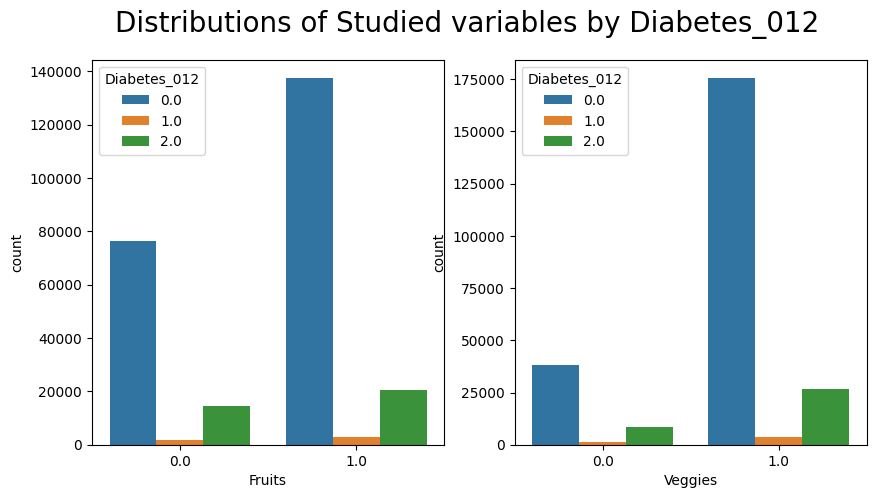

In [47]:
# Creation of subplots:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))

# Flatten the axes array to a 1D array
axes = axes.flatten()
sb.countplot(data=df_reduced, x="Fruits", hue="Diabetes_012", ax=axes[0])
sb.countplot(data=df_reduced, x="Veggies", hue="Diabetes_012", ax=axes[1])

# Adjust layout
# plt.tight_layout()
plt.suptitle("Distributions of Studied variables by Diabetes_012", fontsize=20)
plt.show()

In [48]:
chi_square_test(df_reduced, 'Fruits', 'Diabetes_012')

Diabetes class 0.0 has a significant association with Diabetes_012
Diabetes class 2.0 has a significant association with Diabetes_012
Diabetes class 1.0 has a significant association with Diabetes_012


{0.0: {'chi2': 449.1227437702422, 'p-value': 1.1195183574992248e-99},
 2.0: {'chi2': 421.61153890191144, 'p-value': 1.0881213885155634e-93},
 1.0: {'chi2': 20.695290489066352, 'p-value': 5.3848280197817e-06}}

In [49]:
chi_square_test(df_reduced, 'Veggies', 'Diabetes_012')

Diabetes class 0.0 has a significant association with Diabetes_012
Diabetes class 2.0 has a significant association with Diabetes_012
Diabetes class 1.0 has a significant association with Diabetes_012


{0.0: {'chi2': 889.2184161960572, 'p-value': 2.1658238017307503e-195},
 2.0: {'chi2': 811.8059748359335, 'p-value': 1.4630291539062376e-178},
 1.0: {'chi2': 55.324713352535845, 'p-value': 1.0217586091525476e-13}}

Features 'Veggies' and 'Fruits' are statistically associated with "Diabetes_012", and because the variables are not too imbalance, simply dropping them is not the way of procedding.

***Improvements in repetitions of the cycle***<br>
Because of procedures in following steps (dropping 'GenHlth' due to redundancy with many variables) it is decided that **both features will be combined**, in order to reduce dimensionality but still mantain the information that they provide.<br>
Feature 'FruitsAndVeggies' will collect if one ingests at least once a day fruits AND vegetables.

In [50]:
# Create a new variable: FruitsAndVeggies
df_reduced['FruitsAndVeggies'] = 0
df_reduced.loc[(df_reduced["Veggies"]==1) & (df_reduced["Fruits"]==1), 'FruitsAndVeggies'] = 1


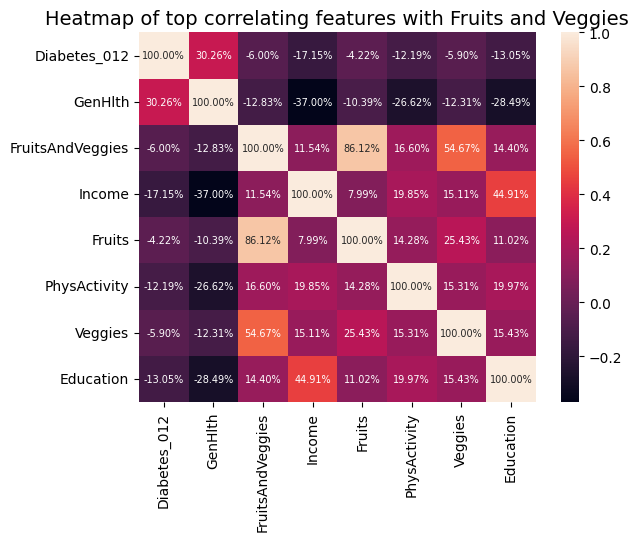

In [51]:
# Top 5 correlating features with fruits and vegetables, including 'Diabetes_012':
top5_features_cd_series_f = df_reduced.corr()['Fruits'].replace(1,np.nan).abs().sort_values(ascending=False).head(5)
top5_features_cd_fruits = (top5_features_cd_series_f.index).tolist()

top5_features_cd_series_v = df_reduced.corr()['Veggies'].replace(1,np.nan).abs().sort_values(ascending=False).head(5)
top5_features_cd_veggies = (top5_features_cd_series_v.index).tolist()

top_corr_fAndv = top5_features_cd_veggies + top5_features_cd_fruits
top_corr_fAndv.append('Diabetes_012')
top_corr_fAndv = list(set(top_corr_fAndv))


# Heatmap
sb.heatmap(df_reduced[top_corr_fAndv].corr(), annot=True, fmt='.2%', annot_kws={'size': 7})
plt.title('Heatmap of top correlating features with Fruits and Veggies', fontsize=14);

As shown in the correlation heatmap, new feature **'FruitsAndVeggies'** keeps the information of variables 'Fruits' and 'Veggies' combined, exhibiting even higher correlation with the rest of related features in the dataset.

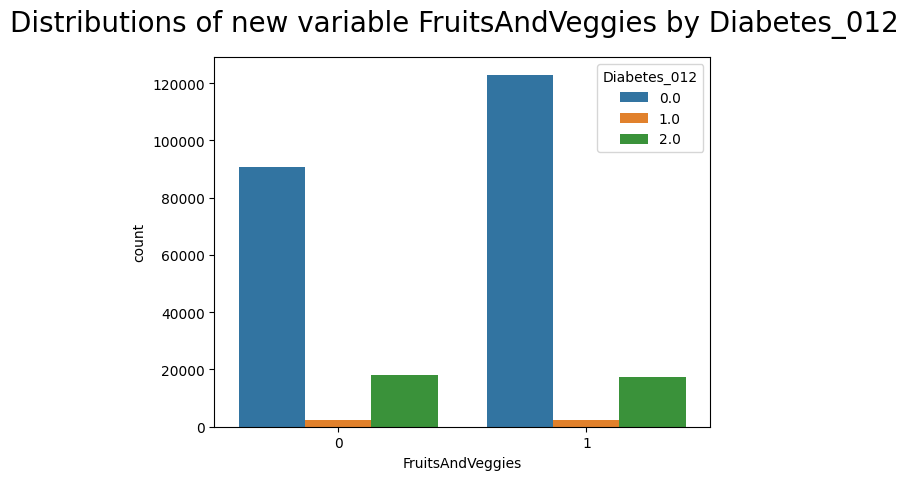

In [52]:
sb.countplot(data=df_reduced, x="FruitsAndVeggies", hue="Diabetes_012")
plt.suptitle("Distributions of new variable FruitsAndVeggies by Diabetes_012", fontsize=20)
plt.show()


IN CONCLUSION: **"Veggies" and "Fruits" are dropped**

In [53]:
df_reduced.drop(['Fruits', 'Veggies'], axis=1, inplace=True)
print("New shape of the reduced dataset: ", df_reduced.shape)

New shape of the reduced dataset:  (253680, 15)


#### Studying "deceiving" variables:
As explained previously, "GenHlth" has a screening effect on the relation of other features with Diabetes. Because it groups many other factors that correlate with Diabetes_012, 'GenHlth' is a deceiving feature for diagnosticating Diabetes that only adds redundant information.<br>

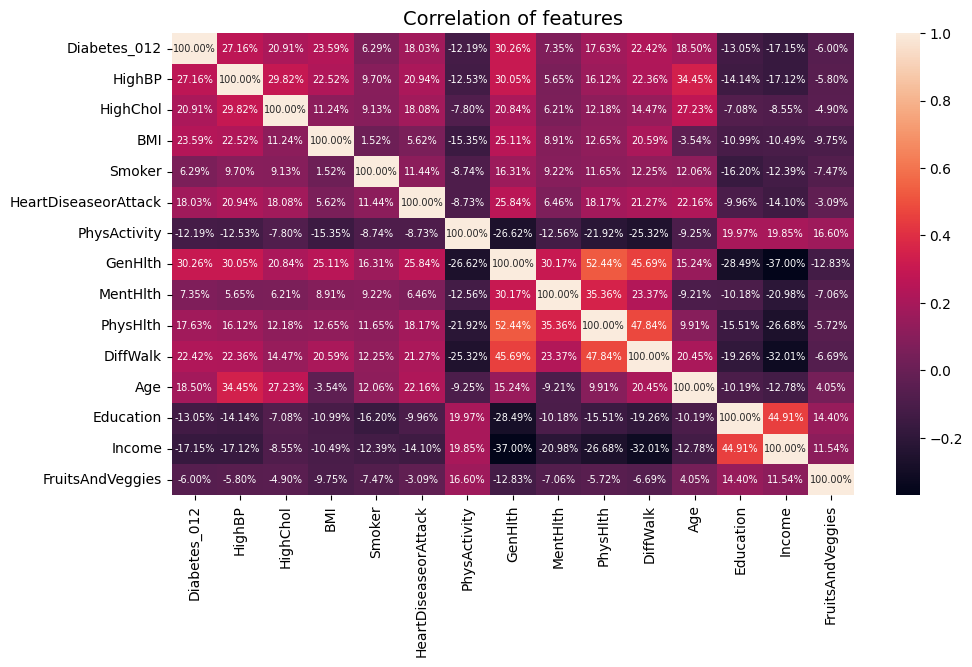

In [54]:
# Heatmap
plt.figure(figsize=(11, 6))
sb.heatmap(df_reduced.corr(), annot=True, fmt='.2%', annot_kws={'size': 7})
plt.title('Correlation of features', fontsize=14);

Studying this heatmap and applying domain knowledge, it can be seen that, besides being considerably correlated with 'Diabetes_012', **"GenHlth" is influenced by most of the other variables** (with correlation values of at least of 12%). Some of the top correlating features with "GenHlth" (excluding Diabetes) are: "PhysHlth", "DiffWalk", "Income", "MentHlth", "Education"...

Therefore, it is decided that information of provided by  variable **"GenHlth"** in the Diabetes diagnosis is redundant. Taking this into account, combined with the generalistic and subjectives qualities of the feature, it is concluded that **it will be deleted**.

Applying the same reasoning and based on the previous observations, variable **"PhysHlth"** (number of days in the past month where one's physical health has been bad) **will also be deleted**.

<Axes: >

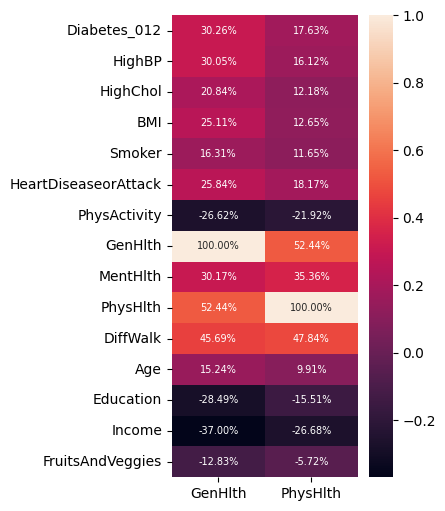

In [55]:
plt.figure(figsize=(3, 6))
sb.heatmap(df_reduced.corr()[['GenHlth','PhysHlth']], annot=True, fmt='.2%', annot_kws={'size': 7})

In [56]:
df_reduced.drop(['GenHlth', 'PhysHlth'], axis=1, inplace=True)
print("New shape of the reduced dataset: ", df_reduced.shape)

New shape of the reduced dataset:  (253680, 13)


In [57]:
# # HEATMAP OF 'GenHlth' AND LOW-CORRELATING-DIABETES FEATURES
# # Features with correlation with "Diabetes_012" < 0.15
# no_corr_diabetes = (df_reduced.columns[(df_reduced.corr()["Diabetes_012"].abs()<0.15)]).tolist()

# # Heatmap
# (no_corr_diabetes).append("GenHlth")

# plt.figure(figsize=(6, 4))
# sb.heatmap(df_reduced[no_corr_diabetes].corr(), annot=True, fmt='.2%', annot_kws={'size': 7})

# plt.title('Correlation between least-related to Diabetes features and "GenHlth"', fontsize=14);
# #plt.tight_layout()

In [58]:
# # HEATMAP OF 'GenHlth' AND INTERMEDIATE FEATURES
# # Max correlation value of this features in the whole dataframe
# max_values_ncd = df_reduced.corr().replace(1,np.nan).abs().describe().loc['max', no_corr_diabetes]

# # Attributes to which they correlate the most.
# intermediate_correlations=[]
# for i, feature in enumerate(max_values_ncd.index):
#     # for every index in max_values_ncd, find the column name where value
#     # matches the value in max_values_ncd
#     name = df_reduced.columns[df_reduced.corr().abs()[feature]==max_values_ncd[feature]].tolist()
#     intermediate_correlations.append(name[0])

# # Heatmap
# #intermediate_correlations= (intermediate_correlations).tolist()
# intermediate_correlations = list(set(intermediate_correlations))
# intermediate_correlations.append("Diabetes_012")
# plt.figure(figsize=(6, 4))
# sb.heatmap(df_reduced[intermediate_correlations].corr(), annot=True, fmt='.2%', annot_kws={'size': 7})
# plt.title('Correlation between intermediate features and "GenHlth"', fontsize=14);

In [59]:
# # HEATMAP THAT SHOWS THE CORRELATION OF THE INTERMEDIATE FEATURES TO 'Diabetes_012'
# no_corr_diabetes= (no_corr_diabetes).tolist()
# no_corr_diabetes.append("GenHlth")
# plt.figure(figsize=(7, 7))
# sb.heatmap(df[no_corr_diabetes].corr(), annot=True, fmt='.2%', annot_kws={'size': 7})
# plt.title('Correlation between least-related to Diabetes features and "GenHlth"', fontsize=14);

## Transformation of data

### Adding labels of age category:

In [60]:
# # Define a map dictionary for age categories
# age_category_map = {
#     1: '18-24',
#     2: '25-29',
#     3: '30-34',
#     4: '35-39',
#     5: '40-44',
#     6: '45-49',
#     7: '50-54',
#     8: '55-59',
#     9: '60-64',
#     10: '65-69',
#     11: '70-74',
#     12: '75-79',
#     13: '80+'
# }

# # Create a new column 'age_category_name' by mapping the numerical age categories
# df_numerical['age_category'] = df_numerical.loc[:,'Age'].map(age_category_map)
# df_numerical[['Age', 'age_category']]

### Scaling data:
Because various models will be tested, including distanced-based algorithms, a scaled version of the dataset will be created.<br>
The chosen scaler is the MinMax scaler with a range of [0,1], as those are the values for the categorical values. This scaler is useful for features with different ranges.


In [1]:
def scale_min_max(df):
    """
    df: dataframe to scale, it does NOT contain target attribute.

    returns scaled dataframe (df_scaled) AND the fitted scaler (scaler)...
    """
    scaler = MinMaxScaler((0,1)) # to set the range of scaled data to (0,10)

    scaler.fit(df)
    data_scaled = scaler.transform(df) # type of data np.array
    df_scaled = pd.DataFrame(data_scaled, columns=df.columns, index=df.index)# Transformation to dataframe

    return df_scaled, scaler

***Improvements in repetitions of the cycle***<br>
After certain rounds of modelling, it is determined that other type of scaling might be beneficial, specially for certain models like _Logistic regression_.
The _PowerTransformer_ scales each feature to make the data more Gaussian-like, in order to stabilize variance and minimize skewness. This scaling deals better with outliers.

Source:<br>
[Comparing effect of different scalers](https://scikit-learn.org/stable/auto_examples/preprocessing/plot_all_scaling.html#sphx-glr-auto-examples-preprocessing-plot-all-scaling-py).<br>
[PowerTransformer documentation](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PowerTransformer.html#sklearn.preprocessing.PowerTransformer)

In [62]:
def scale_power_transformer(df):
    """
    df: dataframe to scale, it does NOT contain target attribute.

    returns scaled dataframe (df_scaled) AND the fitted scaler (scaler)...
    """
    scaler = PowerTransformer()

    scaler.fit(df)
    data_scaled = scaler.transform(df) # type of data np.array
    df_scaled = pd.DataFrame(data_scaled, columns=df.columns, index=df.index)# Transformation to dataframe

    return df_scaled, scaler

### Resampling to deal with imbalance of "Diabetes_012".
There is a clear imbalance in the dataset regarding the target variable "Diabetes_012". This can have large consequences in the performance of the trained model.

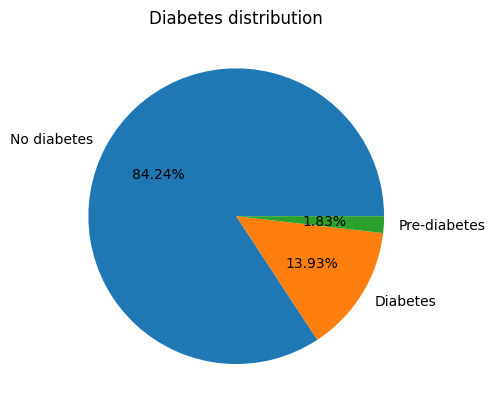

In [68]:
# plt.subplots(1, 2, figsize=(16, 5));

# plt.subplot(1, 2, 1)
labels = ["No diabetes", "Diabetes", "Pre-diabetes"]
plt.pie(df["Diabetes_012"].sort_values().value_counts(), labels=labels, autopct='%.02f%%');
plt.title("Diabetes distribution");

# plt.subplot(1, 2, 2)
# labels = ["No diabetes", "Diabetes", "Pre-diabetes"]
# plt.pie(df_reduced["Diabetes_012"].sort_values().value_counts(), labels=labels, autopct='%.02f%%');
# plt.title("Diabetes distribution in manually-reduced dataset")

# plt.suptitle("Imbalance of 'Diabetes_012' in different datasets");

In [ ]:
df.shape

For an imbalanced class dataset F1 score is a more appropriate metric. After checking it, i will oversample...
https://www.analyticsvidhya.com/blog/2021/06/5-techniques-to-handle-imbalanced-data-for-a-classification-problem/#h-what-is-imbalanced-data-and-how-to-handle-it

In order to deal with this imbalance, methods like undersampling or upsampling can be applied.

# Modelling and Evaluation

## *Functions to create different datasets:*
 These functions will be used to create subdatasets from undersampling techniques, upsampling techniques, with the whole number of orignial rows, with scaled data, etc.

In [ ]:
def num_of_each_diabetes_category(df):
    """
    df: dataframe containing feature "Diabetes_012".
    *df can be scaled with minMax scaling.

    Returns 3 variables (int), containing the total data of each "Diabetes_012" category.
    """
    n_diabetes_0 = (df['Diabetes_012']==0).sum()
    n_diabetes_1 = (df['Diabetes_012']==1).sum()
    n_diabetes_2 = (df['Diabetes_012']==2).sum()
    # print("Number of data with NO diabetes: ", n_diabetes_0)
    # print("Number of data with PRE diabetes: ", n_diabetes_1)
    # print("Number of data with diabetes: ", n_diabetes_2)

    return n_diabetes_0, n_diabetes_1, n_diabetes_2

In [ ]:
def count_diabetes_and_create_df(df):
    """
    df: dataframe containing feature "Diabetes_012"

    returns 3 different dtfs, one for each category of "Diabetes_012", and
    a tuple with the result of calling function num_of_each_diabetes_category
    """
    #create different dataframes of majority and minority classes
    df_diab0 = df[(df['Diabetes_012']==0)]
    df_diab1 = df[(df['Diabetes_012']==1)]
    df_diab2 = df[(df['Diabetes_012']==2)]

    return df_diab0, df_diab1, df_diab2, num_of_each_diabetes_category(df)


In [ ]:
def undersample_dataframe(df, n_samples):
    """
    df: dataframe to undersample
    n_samples: number of data in the new undersampled df.

    returns undersampled df.
    """
    # print("Undersampling...")
    return resample(df,
                    replace=False,            # sample with replacement
                    n_samples= n_samples,
                    random_state=42)          # reproducible results

In [ ]:
def oversample_dataframe(df, key_label, n_samples):
    """
    df: dataframe conaining the minority class to oversample.
    n_samples: number of data of the minority class in the df.
    key_label = value of the minority class to oversample

    returns dataframe of the minority class, including the new generated
    values with SMOTE oversampling.
    """
    # print("Oversampling...")
    smote = SMOTE(sampling_strategy={key_label: n_samples}) #Class label 1 is the minority
    df_of_diabkey_label_oversampled, _ = smote.fit_resample(df, df['Diabetes_012'])
    return df_of_diabkey_label_oversampled[(df_of_diabkey_label_oversampled['Diabetes_012']==key_label)]

In [ ]:
def create_balanced_df_to_diabetes0(df):
    """
    df: dataframe containing feature "Diabetes_012"

    returns a balance dataframe where number of all "Diabetes_012" categories
    equals number of data with Diabetes_012 == 0.
    """
    df_diab0, df_diab1, df_diab2, num_diabetes = count_diabetes_and_create_df(df)

    df_diab1_oversampled = oversample_dataframe(df, 1, num_diabetes[0])
    df_diab2_oversampled = oversample_dataframe(df, 2, num_diabetes[0])

    # Combine majority class with upsampled minority class
    # print("Creating balanced dataframe for NO diabetes...")
    return pd.concat([df_diab0, df_diab1_oversampled, df_diab2_oversampled])

In [ ]:
def create_balanced_df_to_diabetes1(df):
    """
    df: dataframe containing feature "Diabetes_012"

    returns a balance dataframe where number of all "Diabetes_012" categories
    equals number of data with Diabetes_012 == 1.
    """
    df_diab0, df_diab1, df_diab2, num_diabetes = count_diabetes_and_create_df(df)

    df_diab0_undersampled = undersample_dataframe(df_diab0, num_diabetes[1])
    df_diab2_undersampled = undersample_dataframe(df_diab2, num_diabetes[1])

    # Combine majority class with upsampled minority class
    # print("Creating balanced dataframe for pre-diabetes...")
    return pd.concat([df_diab0_undersampled, df_diab1, df_diab2_undersampled])

In [ ]:
def create_balanced_df_to_diabetes2(df):
    """
    df: dataframe containing feature "Diabetes_012"

    returns a balance dataframe where number of all "Diabetes_012" categories
    equals number of data with Diabetes_012 == 2.
    """
    df_diab0, df_diab1, df_diab2, num_diabetes = count_diabetes_and_create_df(df)

    df_diab0_undersampled = undersample_dataframe(df_diab0, num_diabetes[2])
    df_diab1_oversampled = oversample_dataframe(df, 1, num_diabetes[2])

    # Combine majority class with upsampled minority class
    # print("Creating balanced dataframe for diabetes...")
    return pd.concat([df_diab0_undersampled, df_diab1_oversampled, df_diab2])

## *Functions to built and evaluate different models:*
With these functions, different models can be hypertuned and test easily with various datasets.

In [ ]:
def train_and_evaluate_classification_models(X, y):
    """
    X: data (in the form of dataframe) of the features
    y: true labels, corresponding to data in X

    Function returns void.
    """

    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Initialize classifiers
    decision_tree = DecisionTreeClassifier()
    random_forest = RandomForestClassifier()
    gaussian_nb = GaussianNB()
    knn = KNeighborsClassifier()
    #svm = SVC()
    logistic_regression = LogisticRegression(solver ="saga")
    xgboost = XGBClassifier()

    # Train and evaluate each model
    models = [decision_tree, gaussian_nb, knn, #svm,
              logistic_regression, random_forest, xgboost]
    for model in models:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

        # Evaluate the model
        accuracy = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred, average="weighted")
        recall = recall_score(y_test, y_pred, average="weighted")
        f1 = f1_score(y_test, y_pred, average="weighted")

        # Print or store the evaluation metrics
        #formatted string literal: syntax for embedding expressions inside string literals.
        print(f"{model.__class__.__name__} - Accuracy: {accuracy:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, F1: {f1:.4f}")



Various modified datasets will be created, in order to test whith which preprocessing steps are the best models achieved.

In [ ]:
# DATASETS OF TRIMMED DATA:
# balanced_df_diab0 = create_balanced_df_to_diabetes0(df)
balanced_df_diab1 = create_balanced_df_to_diabetes1(df)
balanced_df_diab2 = create_balanced_df_to_diabetes2(df)

# List:
list_trimmed_df = (balanced_df_diab1, balanced_df_diab2)
names_for_trimmed_df = ("Trimmed data balanced to PRE-diabetes",
                        "Trimmed data balanced to diabetes")

# DATASETS OF ORIGINAL FEATURES:
# balanced_df_diab0 = create_balanced_df_to_diabetes0(df_originalFeatures)
balanced_df_diab1 = create_balanced_df_to_diabetes1(df_originalFeatures)
balanced_df_diab2 = create_balanced_df_to_diabetes2(df_originalFeatures)

# List:
list_oriFeat_df = (balanced_df_diab1, balanced_df_diab2)
names_for_oriFeat_df = ("Original features data balanced to PRE-diabetes",
                        "Original features data balanced to diabetes")

# DATASETS OF ORIGINAL ROWS:
# balanced_df_diab0 = create_balanced_df_to_diabetes0(originalRows_df)
balanced_df_diab1 = create_balanced_df_to_diabetes1(originalRows_df)
balanced_df_diab2 = create_balanced_df_to_diabetes2(originalRows_df)

# List:
list_oriRows_df = (balanced_df_diab1, balanced_df_diab2)
names_for_oriRows_df = ("Data with original rows balanced to PRE-diabetes",
                        "Data with original rows balanced to diabetes")

In [ ]:
balanced_df_diab2.describe()


,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
count,106038.0000,106038.000000,106038.000000,106038.000000,106038.000000,106038.000000,106038.00000,106038.000000,106038.000000,106038.000000,...,106038.000000,106038.000000,106038.000000,106038.000000,106038.000000,106038.000000,106038.000000,106038.000000,106038.000000,106038.000000
mean,1.0000,0.586782,0.562196,0.979178,30.062251,0.478564,0.05754,0.143012,0.699967,0.613685,...,0.954506,0.102025,2.879421,3.962373,5.964157,0.257654,0.451015,8.763295,4.888166,5.608557
std,0.8165,0.476393,0.479103,0.138992,6.727968,0.481731,0.22381,0.337295,0.441203,0.469558,...,0.199141,0.289266,1.062131,8.381522,10.136178,0.424384,0.480806,2.756769,1.012712,2.163783
min,0.0000,0.000000,0.000000,0.000000,12.000000,0.000000,0.00000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.0000,0.000000,0.000000,1.000000,25.582026,0.000000,0.00000,0.000000,0.000000,0.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,7.000000,4.000000,4.000000
50%,1.0000,1.000000,1.000000,1.000000,29.000000,0.295995,0.00000,0.000000,1.000000,1.000000,...,1.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.001469,9.000000,5.000000,6.000000
75%,2.0000,1.000000,1.000000,1.000000,33.167061,1.000000,0.00000,0.000000,1.000000,1.000000,...,1.000000,0.000000,3.964073,3.000000,7.000000,0.615255,1.000000,11.000000,6.000000,8.000000
max,2.0000,1.000000,1.000000,1.000000,60.000000,1.000000,1.00000,1.000000,1.000000,1.000000,...,1.000000,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,13.000000,6.000000,8.000000


In [ ]:
balanced_df_diab2['CholCheck'].round()
#[balanced_df_diab2['CholCheck']<1]

array([1., 0.])

In [ ]:
list_X = (df_reduced.drop('Diabetes_012', axis=1, inplace=False))
list_y = (df_reduced['Diabetes_012'])

X = list_X.values
pca = PCA(n_components=0.99)
X_pca = pca.fit_transform(X)

# Get the explained variance ratio for each principal component
explained_variance_ratio = pca.explained_variance_ratio_

# Cumulative explained variance
cumulative_explained_variance = np.cumsum(explained_variance_ratio)

# Determine the number of components that explain a certain amount of variance
target_explained_variance = 0.99
num_components = np.argmax(cumulative_explained_variance >= target_explained_variance) + 1

# Print the results
print(f"Number of components explaining {target_explained_variance * 100:.2f}% variance: {num_components}")
print(f"Explained variance ratio for each component: {explained_variance_ratio}")

Number of components explaining 99.00% variance: 6
Explained variance ratio for each component: [0.49538397 0.2180038  0.20472432 0.04913646 0.02128174 0.00397392]


In [ ]:
print("SCALED DATA WITH EVERYTHING")
for i in range(len(list_trimmed_df)):
    # Divide dataset in data and labels.
    list_X = []
    list_y = []
    for df in list_trimmed_df:
        list_X.append(df.drop('Diabetes_012', axis=1, inplace=False))
        list_y.append(df['Diabetes_012'])

    print(f"For {names_for_trimmed_df[i]}")
    train_and_evaluate_classification_models(list_X[i], list_y[i])
    print("\n")

SCALED DATA WITH EVERYTHING
For Trimmed data balanced to PRE-diabetes
DecisionTreeClassifier - Accuracy: 0.4246, Precision: 0.4259, Recall: 0.4246, F1: 0.4252
GaussianNB - Accuracy: 0.4995, Precision: 0.4839, Recall: 0.4995, F1: 0.4567
KNeighborsClassifier - Accuracy: 0.4556, Precision: 0.4545, Recall: 0.4556, F1: 0.4497
SVC - Accuracy: 0.5052, Precision: 0.4996, Recall: 0.5052, F1: 0.5000


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


LogisticRegression - Accuracy: 0.5146, Precision: 0.5050, Recall: 0.5146, F1: 0.5056
RandomForestClassifier - Accuracy: 0.4858, Precision: 0.4871, Recall: 0.4858, F1: 0.4860
XGBClassifier - Accuracy: 0.4941, Precision: 0.4914, Recall: 0.4941, F1: 0.4920


For Trimmed data balanced to diabetes
DecisionTreeClassifier - Accuracy: 0.7056, Precision: 0.7034, Recall: 0.7056, F1: 0.7044
GaussianNB - Accuracy: 0.5320, Precision: 0.5307, Recall: 0.5320, F1: 0.5309
KNeighborsClassifier - Accuracy: 0.6658, Precision: 0.6831, Recall: 0.6658, F1: 0.6472


In [ ]:
print("SCALED DATA WITH >40 TRIMMED")
for i in range(len(list_trimmed_df)):
    # Divide dataset in data and labels.
    list_X = []
    list_y = []
    for df in list_trimmed_df:
        list_X.append(df.drop('Diabetes_012', axis=1, inplace=False))
        list_y.append(df['Diabetes_012'])

    print(f"For {names_for_trimmed_df[i]}")
    train_and_evaluate_classification_models(list_X[i], list_y[i])
    print("\n")

SCALED DATA WITH >40 TRIMMED
For Trimmed data balanced to PRE-diabetes
DecisionTreeClassifier - Accuracy: 0.4402, Precision: 0.4398, Recall: 0.4402, F1: 0.4399
GaussianNB - Accuracy: 0.4968, Precision: 0.4794, Recall: 0.4968, F1: 0.4574
KNeighborsClassifier - Accuracy: 0.4438, Precision: 0.4381, Recall: 0.4438, F1: 0.4363
SVC - Accuracy: 0.5047, Precision: 0.4964, Recall: 0.5047, F1: 0.4975


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


LogisticRegression - Accuracy: 0.5151, Precision: 0.5026, Recall: 0.5151, F1: 0.5023
RandomForestClassifier - Accuracy: 0.5036, Precision: 0.4964, Recall: 0.5036, F1: 0.4983
XGBClassifier - Accuracy: 0.4971, Precision: 0.4917, Recall: 0.4971, F1: 0.4931


For Trimmed data balanced to diabetes
DecisionTreeClassifier - Accuracy: 0.6858, Precision: 0.6837, Recall: 0.6858, F1: 0.6847
GaussianNB - Accuracy: 0.5107, Precision: 0.5195, Recall: 0.5107, F1: 0.5128
KNeighborsClassifier - Accuracy: 0.6561, Precision: 0.6714, Recall: 0.6561, F1: 0.6360


In [ ]:
print("SCALED DATA WITH >60 TRIMMED")
for i in range(len(list_trimmed_df)):
    # Divide dataset in data and labels.
    list_X = []
    list_y = []
    for df in list_trimmed_df:
        list_X.append(df.drop('Diabetes_012', axis=1, inplace=False))
        list_y.append(df['Diabetes_012'])

    print(f"For {names_for_trimmed_df[i]}")
    train_and_evaluate_classification_models(list_X[i], list_y[i])
    print("\n")

SCALED DATA WITH >60 TRIMMED
For Trimmed data balanced to PRE-diabetes
DecisionTreeClassifier - Accuracy: 0.3906, Precision: 0.3911, Recall: 0.3906, F1: 0.3908
GaussianNB - Accuracy: 0.4798, Precision: 0.4602, Recall: 0.4798, F1: 0.4505
KNeighborsClassifier - Accuracy: 0.4287, Precision: 0.4257, Recall: 0.4287, F1: 0.4250


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


LogisticRegression - Accuracy: 0.4993, Precision: 0.4887, Recall: 0.4993, F1: 0.4880
RandomForestClassifier - Accuracy: 0.4957, Precision: 0.4957, Recall: 0.4957, F1: 0.4946
XGBClassifier - Accuracy: 0.4816, Precision: 0.4836, Recall: 0.4816, F1: 0.4820


For Trimmed data balanced to diabetes
DecisionTreeClassifier - Accuracy: 0.6896, Precision: 0.6873, Recall: 0.6896, F1: 0.6884
GaussianNB - Accuracy: 0.5171, Precision: 0.5221, Recall: 0.5171, F1: 0.5187
KNeighborsClassifier - Accuracy: 0.6476, Precision: 0.6640, Recall: 0.6476, F1: 0.6263


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


LogisticRegression - Accuracy: 0.5191, Precision: 0.5134, Recall: 0.5191, F1: 0.5136
RandomForestClassifier - Accuracy: 0.7718, Precision: 0.7857, Recall: 0.7718, F1: 0.7762
XGBClassifier - Accuracy: 0.7802, Precision: 0.7975, Recall: 0.7802, F1: 0.7849




In [ ]:
print("TRIMMED DATA")
for i in range(len(list_trimmed_df)):
    # Divide dataset in data and labels.
    list_X = []
    list_y = []
    for df in list_trimmed_df:
        list_X.append(df.drop('Diabetes_012', axis=1, inplace=False))
        list_y.append(df['Diabetes_012'])

    print(f"For {names_for_trimmed_df[i]}")
    train_and_evaluate_classification_models(list_X[i], list_y[i])
    print("\n")

In [ ]:
print("ORIGINAL FEAT DATA")
for i in range(len(list_oriFeat_df)):
    # Divide dataset in data and labels.
    list_X = []
    list_y = []
    for df in list_oriFeat_df:
        list_X.append(df.drop('Diabetes_012', axis=1, inplace=False))
        list_y.append(df['Diabetes_012'])

    print(f"For {names_for_oriFeat_df[i]}")
    train_and_evaluate_classification_models(list_X[i], list_y[i], use_pca=False)
    print("\n")

In [ ]:
print("ORIGINAL ROW DATA")
for i in range(len(list_oriRows_df)):
    # Divide dataset in data and labels.
    list_X = []
    list_y = []
    for df in list_oriRows_df:
        list_X.append(df.drop('Diabetes_012', axis=1, inplace=False))
        list_y.append(df['Diabetes_012'])

    print(f"For {names_for_oriRows_df[i]}")
    train_and_evaluate_classification_models(list_X[i], list_y[i], use_pca=False)
    print("\n")

In [ ]:
#  # Apply PCA if specified
#     if use_pca:
#         scaler = StandardScaler()
#         X_train = scaler.fit_transform(X_train)
#         X_test = scaler.transform(X_test)

#         pca = PCA(n_components=0.99)  # Adjusting the explained variance
#         X_train = pca.fit_transform(X_train)
#         X_test = pca.transform(X_test)


In this project, the aim is to predict Type 2 diabetes, which in general develops at middle age.

A respondent was considered to have type 2 diabetes if the respondent was older than 30, not pregnant, and answered yes to the question “Have you ever been told you have diabetes?”


# Further evaluations
Con suerte se me ocurre algo un poco más pro que mirar métricas y ya...
Vale, creo que aquí debería meter el clustering.. y comentar un poco si las clasificaciones parecen coincidir con el clustering... ??

# **Appendix:**

## Cell 1.

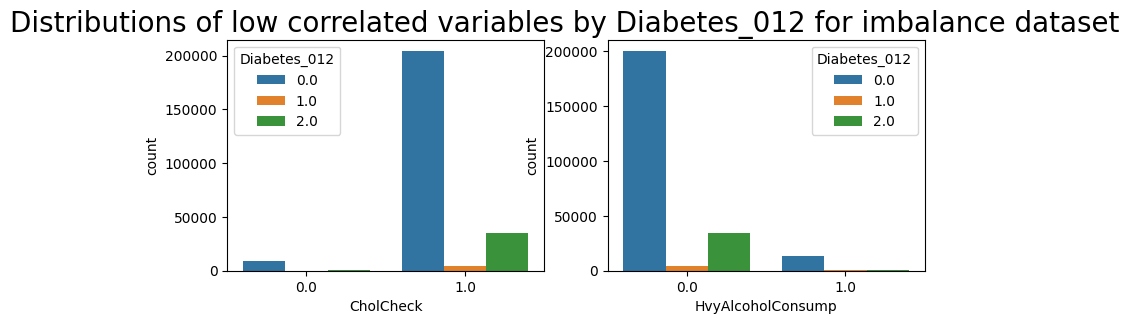

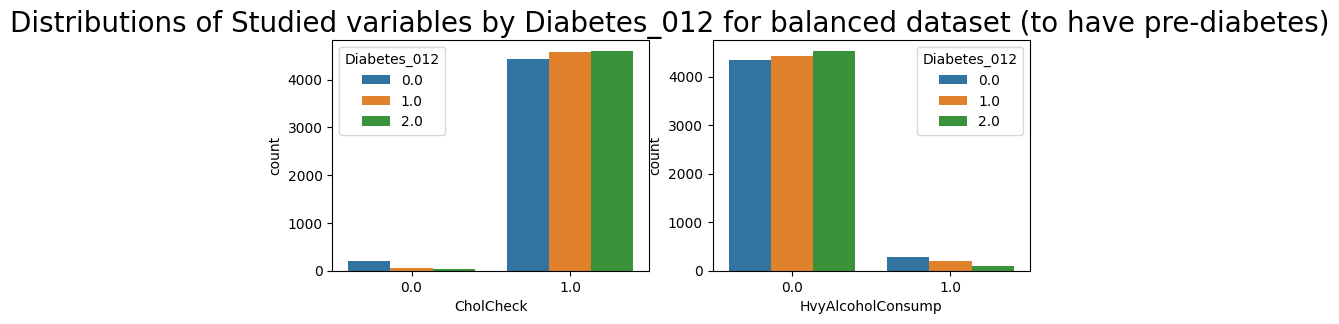

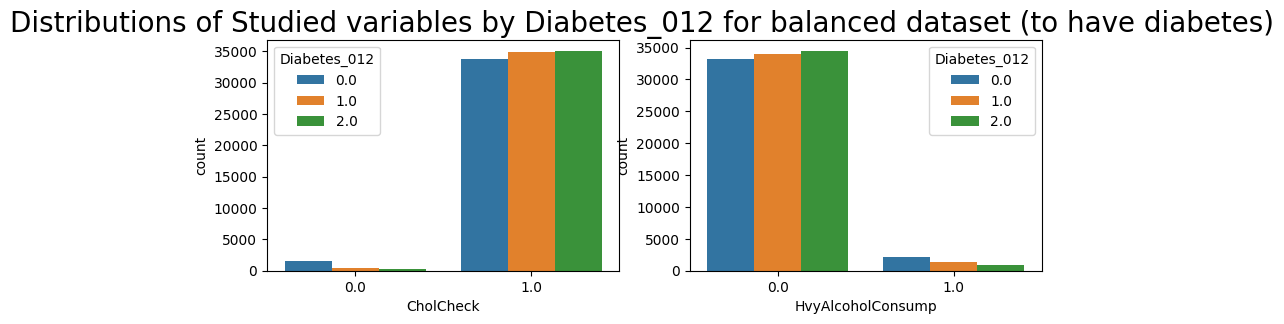

In [ ]:
# IMBALANCE DATA
# Creation of subplots:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(9, 3))

# Flatten the axes array to a 1D array
axes = axes.flatten()#Converting the 2D array of axes objects into a 1D array.
                     #Useful when you want iterating over the subplots,
                     #regardless of whether there is one row or multiple rows.

sb.countplot(data=df, x="CholCheck", hue="Diabetes_012", ax=axes[0])

sb.countplot(data=df, x="HvyAlcoholConsump", hue="Diabetes_012", ax=axes[1])

# Adjust layout
# plt.tight_layout()
plt.suptitle("Distributions of low correlated variables by Diabetes_012 for imbalance dataset", fontsize=20)
plt.show()


# BALANCED DATA TO HAVING PRE-DIABETES (Diabetes_012=1)
# Creation of subplots:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(9, 3))

# Flatten the axes array to a 1D array
axes = axes.flatten()#Converting the 2D array of axes objects into a 1D array.
                     #Useful when you want iterating over the subplots,
                     #regardless of whether there is one row or multiple rows.

sb.countplot(data=balanced_df_diab1, x='CholCheck', hue="Diabetes_012", ax=axes[0])

sb.countplot(data=balanced_df_diab1, x='HvyAlcoholConsump', hue="Diabetes_012", ax=axes[1])

# Adjust layout
# plt.tight_layout()
plt.suptitle("Distributions of Studied variables by Diabetes_012 for balanced dataset (to have pre-diabetes)", fontsize=20)
plt.show()


# BALANCED DATA TO HAVING DIABETES (Diabetes_012=2)
# Creation of subplots:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 3))

# Flatten the axes array to a 1D array
axes = axes.flatten()#Converting the 2D array of axes objects into a 1D array.
                     #Useful when you want iterating over the subplots,
                     #regardless of whether there is one row or multiple rows.

sb.countplot(data=balanced_df_diab2, x=balanced_df_diab2['CholCheck'].round(), hue="Diabetes_012", ax=axes[0])

sb.countplot(data=balanced_df_diab2, x=balanced_df_diab2['HvyAlcoholConsump'].round(), hue="Diabetes_012", ax=axes[1])

# Adjust layout
# plt.tight_layout()
plt.suptitle("Distributions of Studied variables by Diabetes_012 for balanced dataset (to have diabetes)", fontsize=20)
plt.show()

In [ ]:
# # Age by diabetes category
# age_order = range(1, 14, 1)
# bplot = sb.countplot(data=df,
#             x="Age",
#             hue="Diabetes_012",
#             order=age_order
#             )

# plt.title("Distribution of Diabetes by Age")
# plt.ylabel("Number of people for each diabetic category")
# plt.grid(color = "grey", linewidth = "0.3", linestyle = "-")
# # Set custom x-axis labels
# custom_labels = ['18-24', '25-29', '30-34', '35-39', '40-44', '45-49', '50-54', '55-59', '60-64', '65-69', '70-74', '75-79', '80+']
# plt.xticks(ticks=range(13), labels=custom_labels, rotation=45, ha='right')
# # add legend and set position to upper right
# plt.legend(title="Diabetic class", loc='upper right');